# **FIFA 22 PLAYERS ANALYSIS ⚽**

--------------------------------
--------------------------------

In [108]:
import json
from IPython.core.display import display, HTML
import tempfile
import numpy as np
import pandas as pd

from math import sqrt
import scipy.stats
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

plt.style.use("ggplot")

## *The FIFA 22 players dataset:*

-----------------------------------

In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

In [110]:
df= pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_22.csv',low_memory=False)
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

In [111]:
list(df.columns.unique())

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [112]:
df['club_position']

0         RW
1         ST
2         ST
3         LW
4        RCM
        ... 
19234    SUB
19235    RES
19236    RES
19237    RES
19238    SUB
Name: club_position, Length: 19239, dtype: object

In [113]:
df = df[['short_name','age','height_cm','weight_kg','nationality_name',
          'club_name','league_name','overall','potential','value_eur',
          'wage_eur','player_positions','club_position','preferred_foot',
          'skill_moves', 'work_rate', 'pace', 'shooting', 'passing',
          'dribbling', 'defending', 'physic','league_level',
          'international_reputation']]
df.head()

short_name  age  height_cm  weight_kg nationality_name  \
0           L. Messi   34        170         72        Argentina   
1     R. Lewandowski   32        185         81           Poland   
2  Cristiano Ronaldo   36        187         83         Portugal   
3          Neymar Jr   29        175         68           Brazil   
4       K. De Bruyne   30        181         70          Belgium   

             club_name             league_name  overall  potential  \
0  Paris Saint-Germain          French Ligue 1       93         93   
1    FC Bayern München    German 1. Bundesliga       92         92   
2    Manchester United  English Premier League       91         91   
3  Paris Saint-Germain          French Ligue 1       91         91   
4      Manchester City  English Premier League       91         91   

     value_eur  ...  skill_moves    work_rate  pace shooting  passing  \
0   78000000.0  ...            4   Medium/Low  85.0     92.0     91.0   
1  119500000.0  ...            4  High/Medium  78.0     92.0     79.0   
2   45000000.0  ...            5     High/Low  87.0     94.0     80.0   
3  129000000.0  ...            5  High/Medium  91.0     83.0     86.0   
4  125500000.0  ...            4    High/High  76.0     86.0     93.0   

  dribbling  defending  physic  league_level  international_reputation  
0      95.0       34.0    65.0           1.0                         5  
1      86.0       44.0    82.0           1.0                         5  
2      88.0       34.0    75.0           1.0                         5  
3      94.0       37.0    63.0           1.0                         5  
4      88.0       64.0    78.0           1.0                         4  

[5 rows x 24 columns]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   short_name                19239 non-null  object 
 1   age                       19239 non-null  int64  
 2   height_cm                 19239 non-null  int64  
 3   weight_kg                 19239 non-null  int64  
 4   nationality_name          19239 non-null  object 
 5   club_name                 19178 non-null  object 
 6   league_name               19178 non-null  object 
 7   overall                   19239 non-null  int64  
 8   potential                 19239 non-null  int64  
 9   value_eur                 19165 non-null  float64
 10  wage_eur                  19178 non-null  float64
 11  player_positions          19239 non-null  object 
 12  club_position             19178 non-null  object 
 13  preferred_foot            19239 non-null  object 
 14  skill_

In [115]:
df.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
nationality_name               0
club_name                     61
league_name                   61
overall                        0
potential                      0
value_eur                     74
wage_eur                      61
player_positions               0
club_position                 61
preferred_foot                 0
skill_moves                    0
work_rate                      0
pace                        2132
shooting                    2132
passing                     2132
dribbling                   2132
defending                   2132
physic                      2132
league_level                  61
international_reputation       0
dtype: int64

In [116]:
df= df.dropna()

In [117]:
df.reset_index(drop=True)

short_name  age  height_cm  weight_kg     nationality_name  \
0                L. Messi   34        170         72            Argentina   
1          R. Lewandowski   32        185         81               Poland   
2       Cristiano Ronaldo   36        187         83             Portugal   
3               Neymar Jr   29        175         68               Brazil   
4            K. De Bruyne   30        181         70              Belgium   
...                   ...  ...        ...        ...                  ...   
17036           Song Defu   22        180         64             China PR   
17037           C. Porter   19        175         70  Republic of Ireland   
17038            N. Logue   21        178         72  Republic of Ireland   
17039           L. Rudden   19        173         66  Republic of Ireland   
17040  E. Lalchhanchhuaha   19        167         61                India   

                 club_name                     league_name  overall  \
0      Paris Saint-Germain                  French Ligue 1       93   
1        FC Bayern München            German 1. Bundesliga       92   
2        Manchester United          English Premier League       91   
3      Paris Saint-Germain                  French Ligue 1       91   
4          Manchester City          English Premier League       91   
...                    ...                             ...      ...   
17036             Wuhan FC            Chinese Super League       47   
17037           Derry City  Rep. Ireland Airtricity League       47   
17038           Finn Harps  Rep. Ireland Airtricity League       47   
17039           Finn Harps  Rep. Ireland Airtricity League       47   
17040  NorthEast United FC             Indian Super League       47   

       potential    value_eur  ...  skill_moves      work_rate  pace shooting  \
0             93   78000000.0  ...            4     Medium/Low  85.0     92.0   
1             92  119500000.0  ...            4    High/Medium  78.0     92.0   
2             91   45000000.0  ...            5       High/Low  87.0     94.0   
3             91  129000000.0  ...            5    High/Medium  91.0     83.0   
4             91  125500000.0  ...            4      High/High  76.0     86.0   
...          ...          ...  ...          ...            ...   ...      ...   
17036         52      70000.0  ...            2  Medium/Medium  58.0     35.0   
17037         59     110000.0  ...            2  Medium/Medium  59.0     39.0   
17038         55     100000.0  ...            2  Medium/Medium  60.0     37.0   
17039         60     110000.0  ...            2  Medium/Medium  68.0     46.0   
17040         60     110000.0  ...            2  Medium/Medium  68.0     38.0   

       passing dribbling  defending  physic  league_level  \
0         91.0      95.0       34.0    65.0           1.0   
1         79.0      86.0       44.0    82.0           1.0   
2         80.0      88.0       34.0    75.0           1.0   
3         86.0      94.0       37.0    63.0           1.0   
4         93.0      88.0       64.0    78.0           1.0   
...        ...       ...        ...     ...           ...   
17036     46.0      48.0       42.0    49.0           1.0   
17037     50.0      46.0       41.0    51.0           1.0   
17038     45.0      49.0       41.0    52.0           1.0   
17039     36.0      48.0       15.0    42.0           1.0   
17040     45.0      48.0       36.0    48.0           1.0   

       international_reputation  
0                             5  
1                             5  
2                             5  
3                             5  
4                             4  
...                         ...  
17036                         1  
17037                         1  
17038                         1  
17039                         1  
17040                         1  

[17041 rows x 24 columns]

***Dataset ready for analysis***

## **EDA**

------------

### **Overall Distribution :**

Ignoring `palette` because no `hue` variable has been assigned.


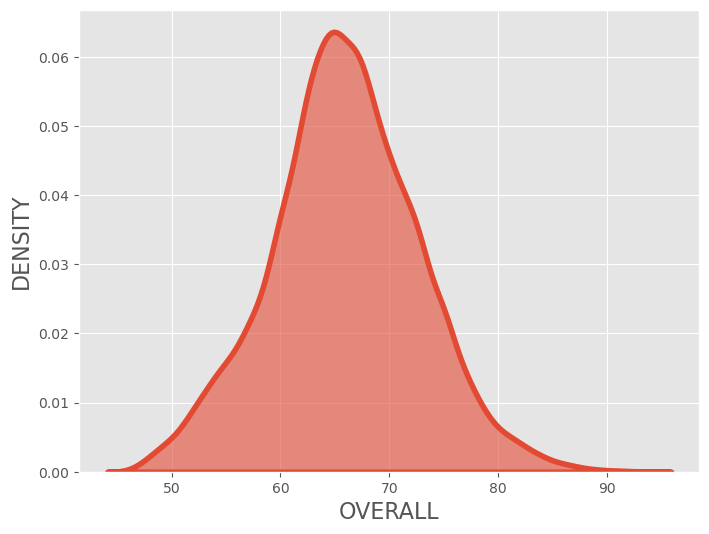

In [118]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=df,
           x='overall',
           fill=True,
           palette='crest',
           alpha=.6,
           linewidth=4)

plt.xlabel('OVERALL',fontsize=16)
plt.ylabel('DENSITY',fontsize=16)
plt.show()

### **1. NATION-WISE ANALYSIS :**

#### **Which country has the most number of players in FIFA 22?**

In [119]:
from collections import Counter
cd=dict(Counter(df['nationality_name']).most_common(5))
cd

{'England': 1537,
 'Germany': 1047,
 'Spain': 967,
 'France': 883,
 'Argentina': 860}

In [120]:
#function for plotting most common [any attribute]

def plot_most_common(category):
    fig, ax = plt.subplots(figsize = (8,5))
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.barh(*zip(*bar_plot.items()))
    plt.title('Most common '+ category)
    plt.show()

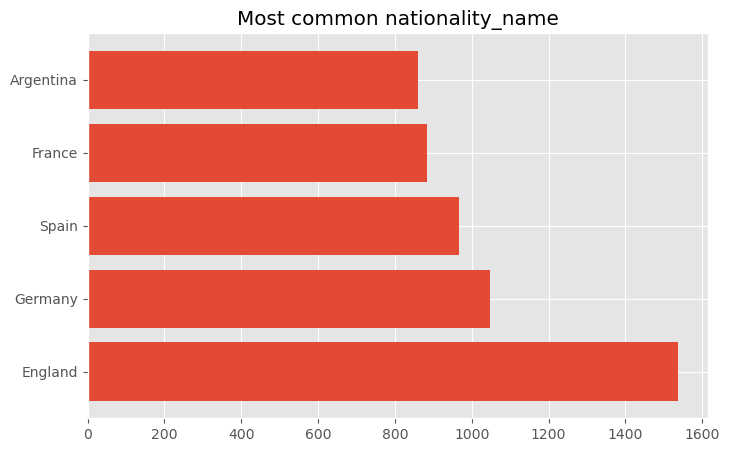

In [121]:
plot_most_common('nationality_name')
plt.show()

In [122]:
country_count = df.nationality_name.value_counts()
counts = country_count.sort_index().reset_index().nationality_name

GeoJSON is a special type of file which is made to represent simple geographical features, along with their non-spatial attributes. Here the features' polygonal coordinates relate with their actual coordinates on the globe, making it easier to plot entities likes districts and states if their coordinates are not provided already in the module.

While going through the data, I saw that the names in the csv and the JSON were not matching, so I changed the name values in DataFrame to be consistent with the ones in the JSON file.

After that I made a chloropleth and GeoScatter to visualize the mean overall, potential and total number of players from each country.

In [123]:
world_geojson = json.load(open("../input/country-coord/countries.geo.json","r"))
countries= pd.DataFrame(df.groupby(['nationality_name']).overall.mean())
countries['potential']= df.groupby(['nationality_name']).potential.mean()
countries['pace']= df.groupby(['nationality_name']).pace.mean()
countries['dribble']= df.groupby(['nationality_name']).dribbling.mean()
countries['passing']= df.groupby(['nationality_name']).passing.mean()
countries.reset_index(inplace=True)
countries.at[28, 'nationality_name'] = 'China'
countries.at[45, 'nationality_name'] = 'United Kingdom'
countries.at[123, 'nationality_name'] = 'Ireland'
countries.at[154, 'nationality_name'] = 'United States of America'

countries['count']=counts

In [124]:
countries

nationality_name    overall  potential       pace    dribble    passing  \
0        Afghanistan  64.000000  69.000000  82.000000  68.000000  55.000000   
1            Albania  66.697674  71.465116  68.395349  63.093023  56.720930   
2            Algeria  70.911111  74.088889  68.733333  69.200000  64.422222   
3            Andorra  64.000000  64.000000  60.000000  53.000000  52.000000   
4             Angola  67.352941  73.411765  78.058824  66.352941  58.117647   
..               ...        ...        ...        ...        ...        ...   
157       Uzbekistan  68.166667  70.500000  71.000000  62.333333  60.166667   
158        Venezuela  63.481675  69.832461  66.937173  58.670157  54.020942   
159            Wales  63.390244  70.674797  69.032520  60.349593  54.829268   
160           Zambia  68.222222  73.666667  74.666667  65.222222  54.222222   
161         Zimbabwe  67.538462  71.230769  74.076923  64.230769  56.076923   

     count  
0        1  
1       43  
2       45  
3        1  
4       17  
..     ...  
157      6  
158    191  
159    123  
160      9  
161     13  

[162 rows x 7 columns]

In [125]:
fig = px.scatter_geo(
    countries,
    geojson=world_geojson,
    featureidkey='properties.name', 
    locations='nationality_name',
    size = 'count',
    color='potential',
    color_continuous_scale='Blues'
)


fig.update_layout(
    title_text = 'Number of players per country',
    geo = dict(
        showland = True,
        landcolor = 'rgb(00, 00, 00)',
        countrycolor = 'rgb(200, 200, 00)',
    ),
)

fig.show()

#### **Which country's players have the highest overall rating in FIFA 22?**

In [126]:
fig= px.choropleth(countries,
                   geojson=world_geojson,
                   featureidkey='properties.name',
                   locations='nationality_name',
                   color='overall',
                   color_continuous_scale='Reds'
)

fig.update_layout(
    title_text = 'Average overall rating per nationality',
    geo = dict(
        showland = True,
        countrycolor = 'rgb(215, 200, 50)',
        
    ),
)

fig.show()

But thi plots doesn't give the accurate demonstrations of how exactly are the features related to each nationality as the number of players of each nationality range from 1 to 1500+. Hence we only take those countries from which there are a minimum of 300 players (Basically the better known footballing nations) registered in the dataset, for further analysis and visualization.

In [127]:
topcount=countries[countries['count']>300]
topcount

nationality_name    overall  potential       pace    dribble  \
6              Argentina  68.770930  73.246512  68.165116  65.653488   
20                Brazil  70.847642  72.966143  69.695284  66.796856   
30              China PR  58.412121  61.618182  66.063636  54.439394   
48               England  64.100846  70.937541  68.266103  60.737150   
56                France  67.710079  73.624009  67.459796  64.696489   
60               Germany  65.784145  71.359121  67.896848  62.248329   
82                 Japan  64.810526  68.852632  67.930526  62.233684   
103               Mexico  66.188312  72.331169  67.243506  63.282468   
110          Netherlands  67.923077  74.297082  67.843501  64.766578   
116               Norway  63.548105  70.300292  68.034985  60.673469   
123              Ireland  63.197640  69.513274  68.625369  58.991150   
124             Portugal  69.940299  75.137313  69.361194  67.459701   
126  Republic of Ireland  60.240580  66.646377  64.310145  57.153623   
131         Saudi Arabia  59.845659  65.421222  68.173633  57.028939   
140                Spain  69.712513  74.941055  67.224405  66.097208   
143               Sweden  63.504399  68.970674  67.234604  60.665689   
155        United States  63.396501  70.848397  67.320700  60.215743   

       passing  count  
6    60.145349    860  
20   61.704958    827  
30   50.206061    330  
48   55.009759   1537  
56   59.532276    883  
60   56.789876   1047  
82   58.058947    475  
103  58.990260    308  
110  59.721485    377  
116  55.425656    343  
123  54.324484    339  
124  61.614925    335  
126  52.289855    345  
131  51.234727    311  
140  62.271975    967  
143  55.970674    341  
155  54.285714    343

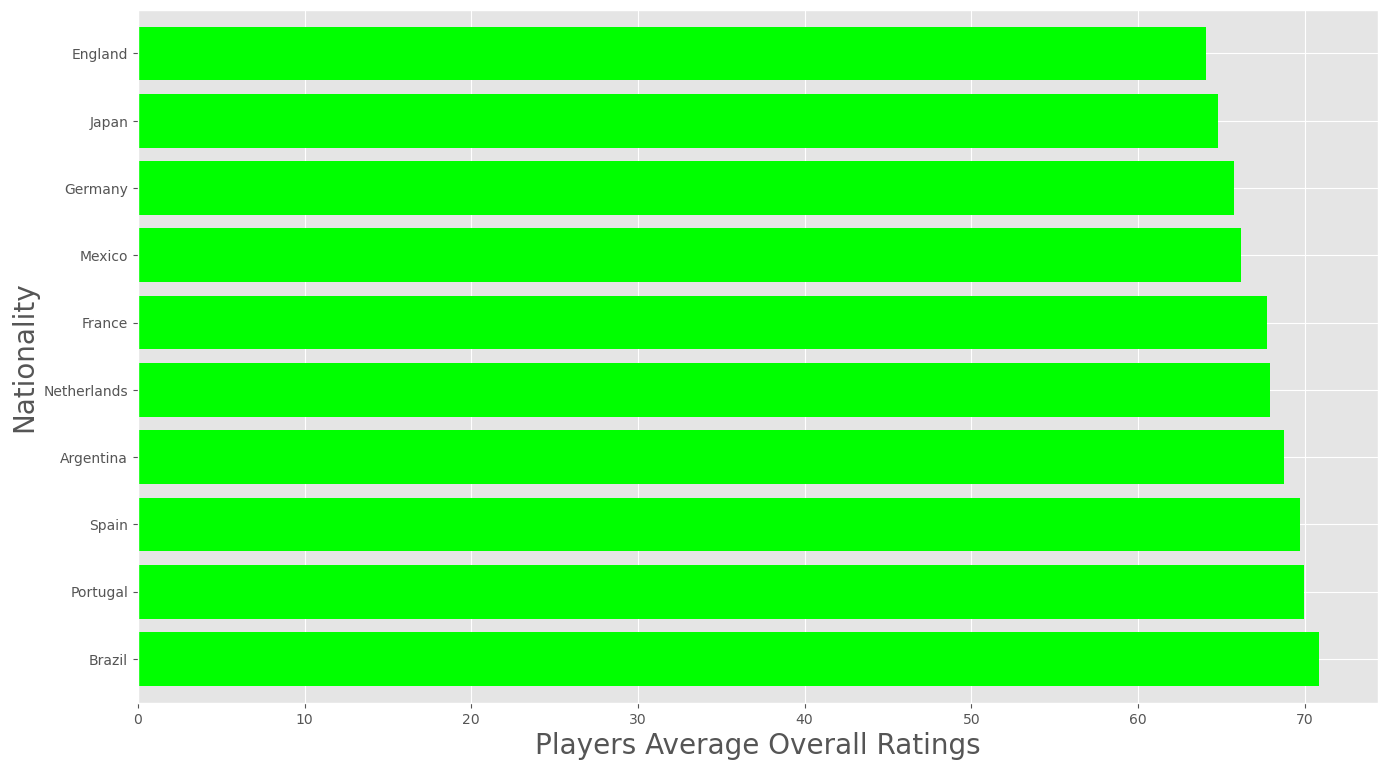

In [128]:
topcount.groupby('nationality_name')['overall'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='lime',
    width=0.8,
    figsize=(16, 9)
)

plt.xlabel('Players Average Overall Ratings', fontsize=20)
plt.ylabel('Nationality', fontsize=20)
plt.show()

In [129]:
fig= px.choropleth(topcount,
                   geojson=world_geojson,
                   featureidkey='properties.name',
                   locations='nationality_name',
                   color='overall',
                   color_continuous_scale='Reds'
)

fig.update_layout(
    title_text = 'Average overall rating per nationality',
    geo = dict(
        showland = True,
        countrycolor = 'rgb(215, 200, 50)',
        
    ),
)

fig.show()

#### **Which country has the fastest players in FIFA 22?**

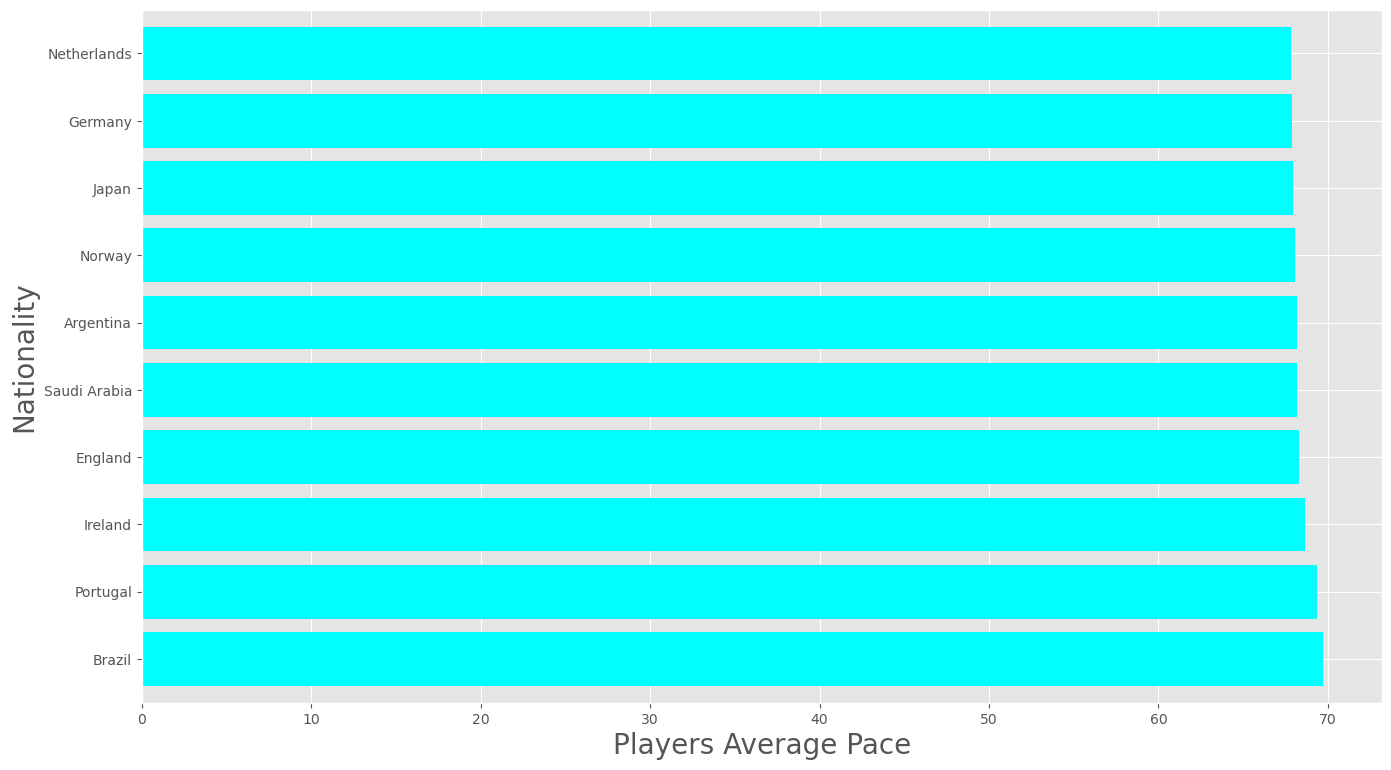

In [130]:
topcount.groupby('nationality_name')['pace'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='aqua',
    width=0.8,
    figsize=(16, 9)
)

plt.xlabel('Players Average Pace', fontsize=20)
plt.ylabel('Nationality', fontsize=20)
plt.show()

In [131]:
fig= px.choropleth(topcount,
                   geojson=world_geojson,
                   featureidkey='properties.name',
                   locations='nationality_name',
                   color='pace',
                   color_continuous_scale='Reds'
)

fig.update_layout(
    title_text = 'Average pace per nationality (min. 300 players)',
    geo = dict(
        showland = True,
        countrycolor = 'rgb(275, 200, 50)',
        
    ),
)

fig.show()

#### **Which country produces the best dribblers in FIFA 22?**

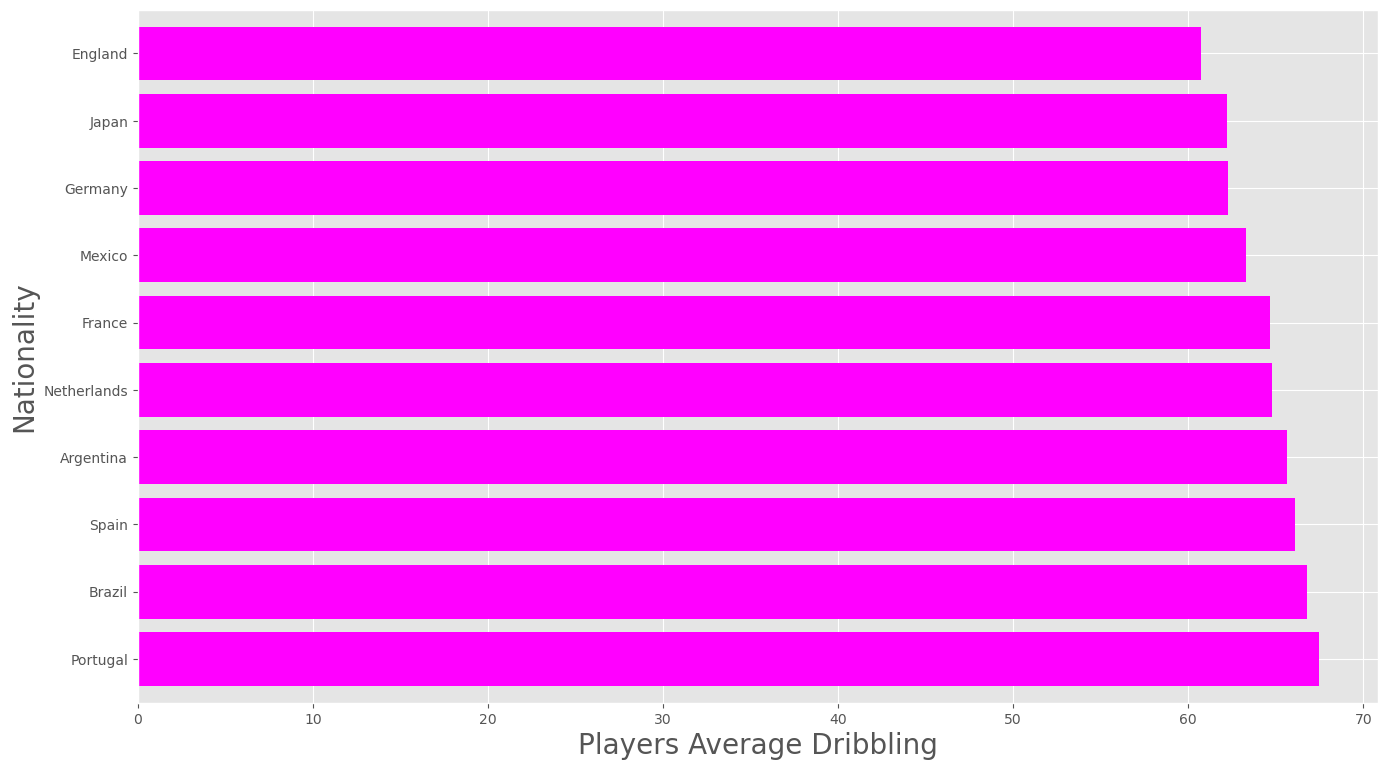

In [132]:
topcount.groupby('nationality_name')['dribble'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='magenta',
    width=0.8,
    figsize=(16, 9)
)

plt.xlabel('Players Average Dribbling', fontsize=20)
plt.ylabel('Nationality', fontsize=20)
plt.show()

In [133]:
fig= px.choropleth(topcount,
                   geojson=world_geojson,
                   featureidkey='properties.name',
                   locations='nationality_name',
                   color='dribble',
                   color_continuous_scale='Reds'
)

fig.update_layout(
    title_text = 'Average dribbling per nationality (min. 300 players)',
    geo = dict(
        showland = True,
        countrycolor = 'rgb(275, 200, 50)',
        
    ),
)

fig.show()

#### **Which country has the best passers in FIFA 22?**

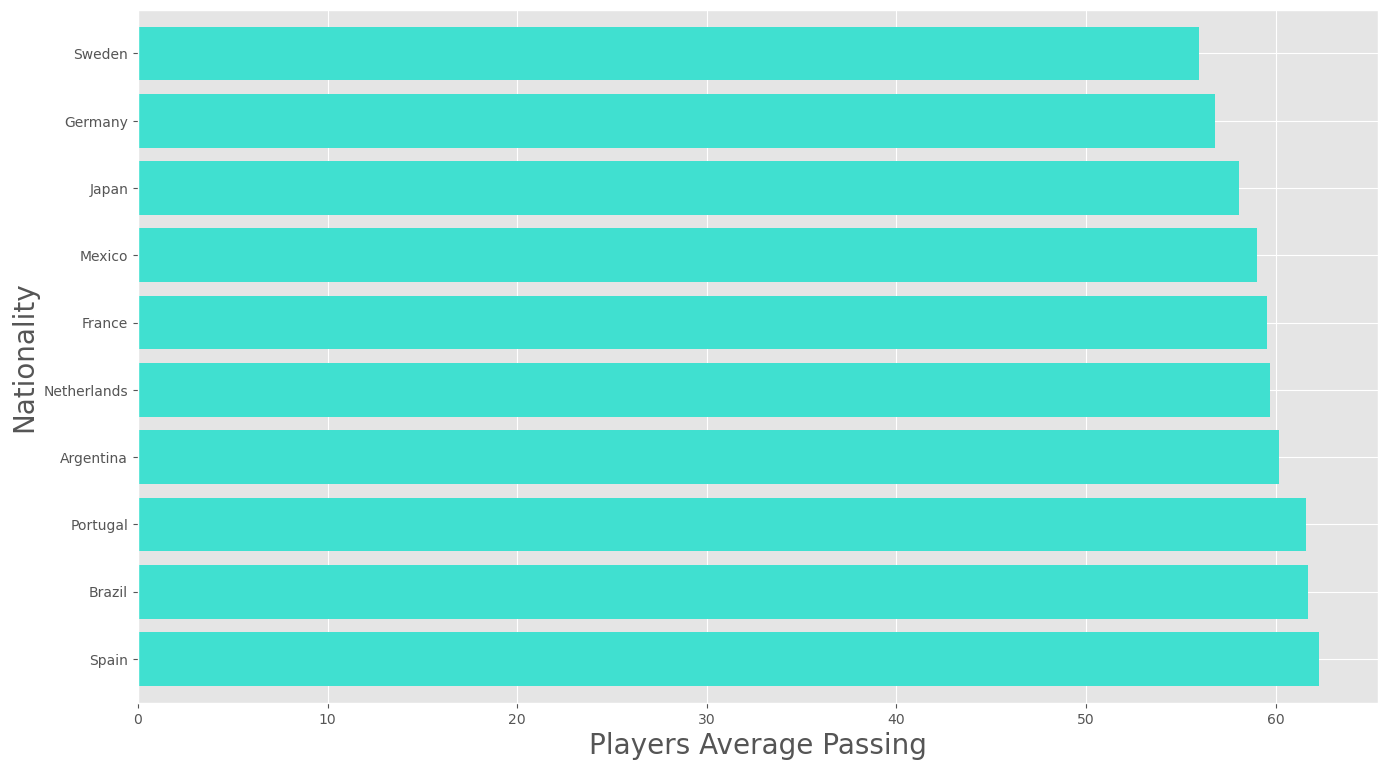

In [134]:
topcount.groupby('nationality_name')['passing'].mean().sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='turquoise',
    width=0.8,
    figsize=(16, 9)
)

plt.xlabel('Players Average Passing', fontsize=20)
plt.ylabel('Nationality', fontsize=20)
plt.show()

In [135]:
fig= px.choropleth(topcount,
                   geojson=world_geojson,
                   featureidkey='properties.name',
                   locations='nationality_name',
                   color='passing',
                   color_continuous_scale='Reds'
)

fig.update_layout(
    title_text = 'Average passing per nationality (min. 300 players)',
    geo = dict(
        showland = True,
        countrycolor = 'rgb(275, 200, 50)',
        
    ),
)

fig.show()

*Joga Bonito!*  Unsurprisingly, **Brazil leads the way in the highest average Overall Rating and Pace**. **Spain tops the chart in the highest average passing**. **Portugal leads the table in highest average Dribbling**. *Early signs of SIUUU!*


[Although a bit unfair for teams like England and Germany which have around 1000+ players from different league levels registered in the FIFA 22, compared to <500 players for teams like Portugal]

#### **Comparing two Nations based on certain features:**

In [136]:
def CompareNations(nation1,nation2,feature):
    if nation1 == nation2:
        print("Enter Different Nationality Names!")
        
    else:
        plt.figure(figsize=(16,10))
        plt.title(nation1+" vs. "+nation2+" based on "+ feature)
        
        df_nation1= df.loc[df['nationality_name']==nation1]
        df_nation2= df.loc[df['nationality_name']==nation2]
        df_nation= pd.concat([df_nation1,df_nation2])
        
        sns.boxplot(data=df_nation,
                   x='nationality_name',
                   y=feature,
                   hue='nationality_name',
                   palette='magma',
                   width=0.4,
                   notch=True,
                   showcaps=False,
                   flierprops={"marker":"x"})
        
        plt.xlabel("Nationality",fontsize=16)
        plt.ylabel(feature,fontsize=16)
        plt.show();

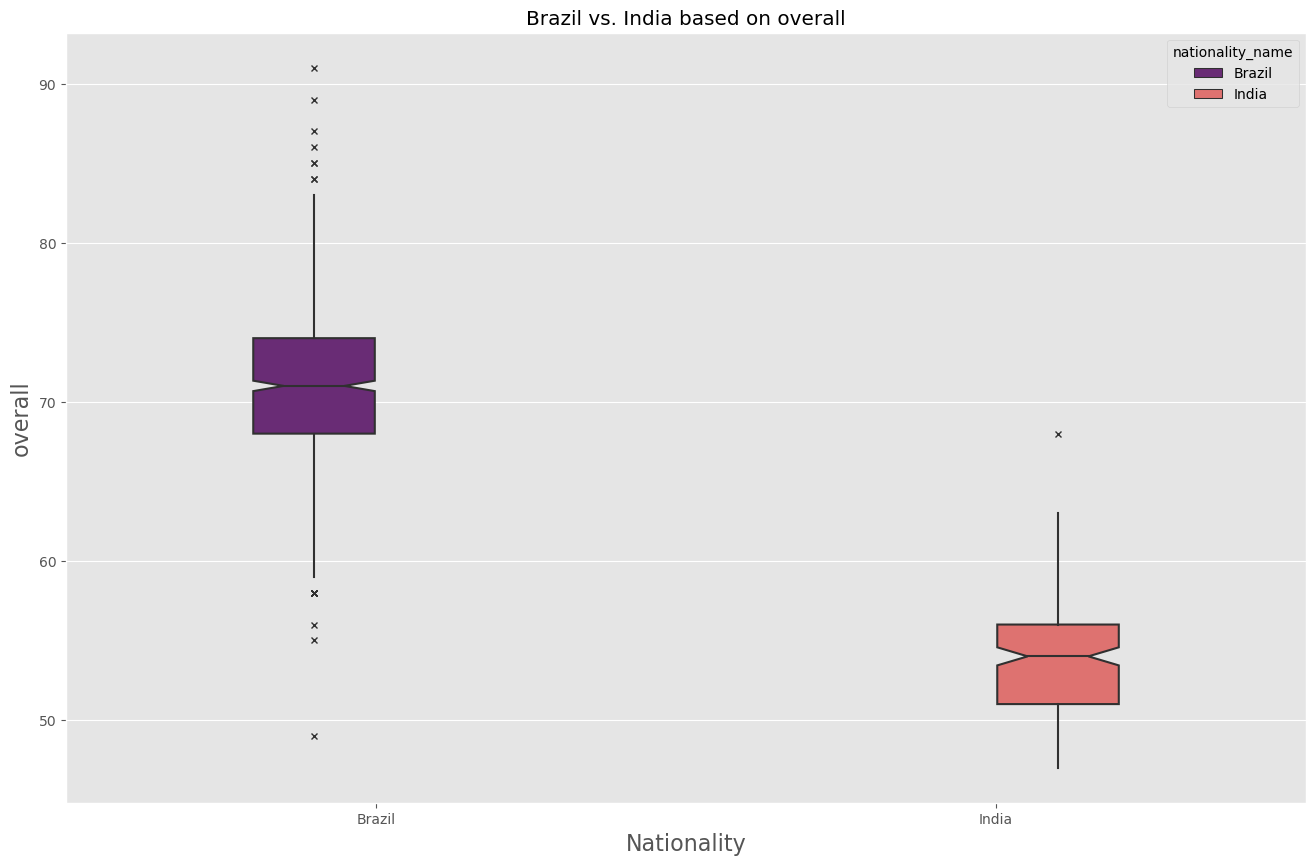

In [137]:
CompareNations('Brazil','India','overall')

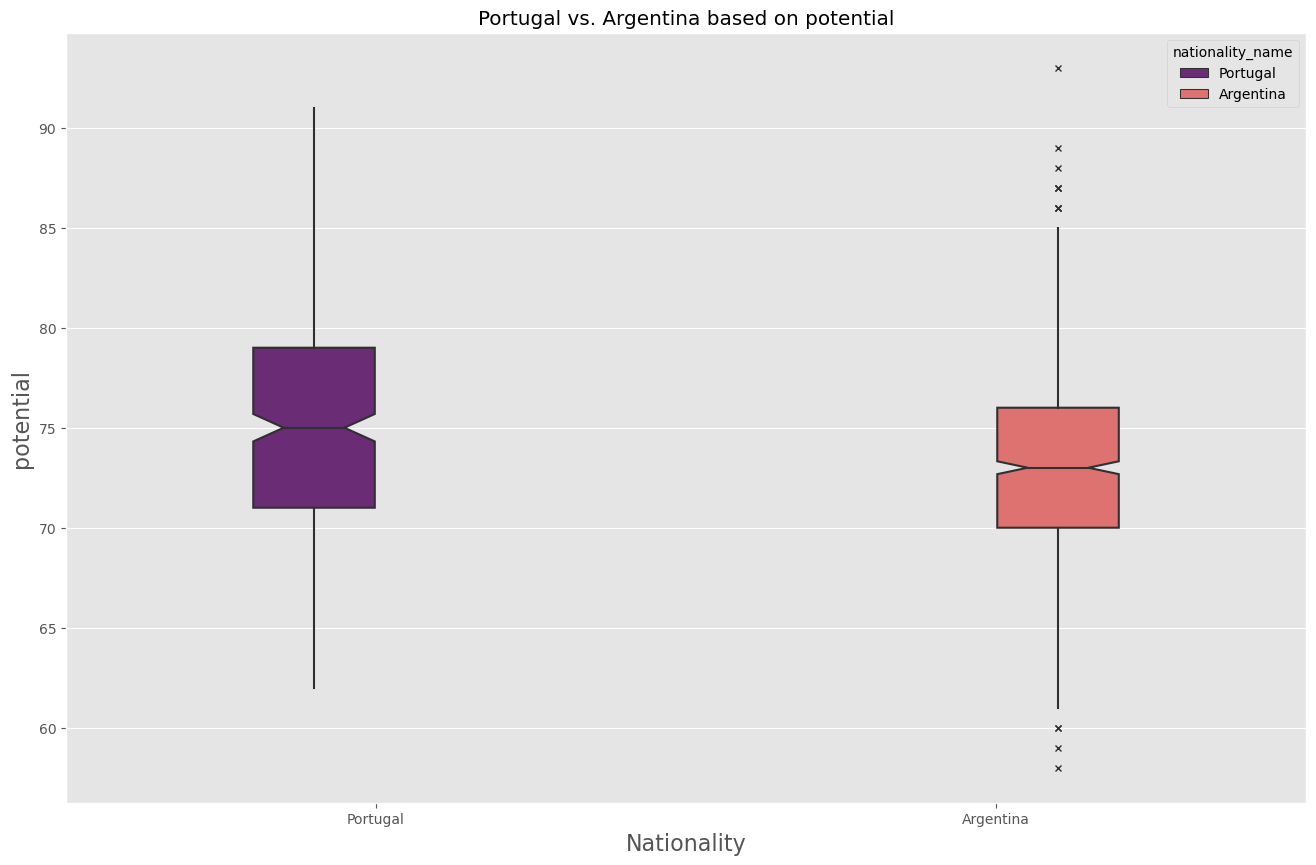

In [138]:
CompareNations('Portugal','Argentina','potential')

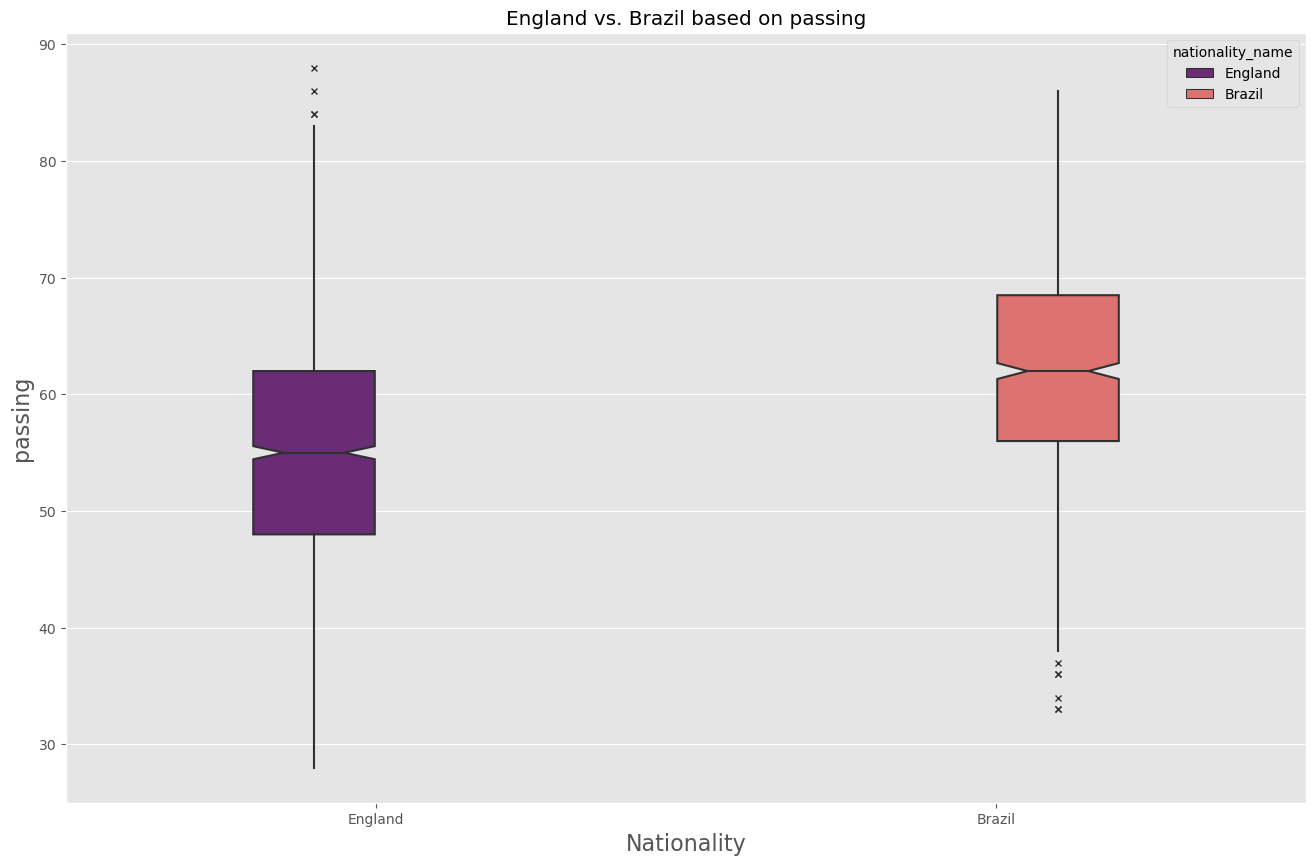

In [139]:
CompareNations('England','Brazil','passing')

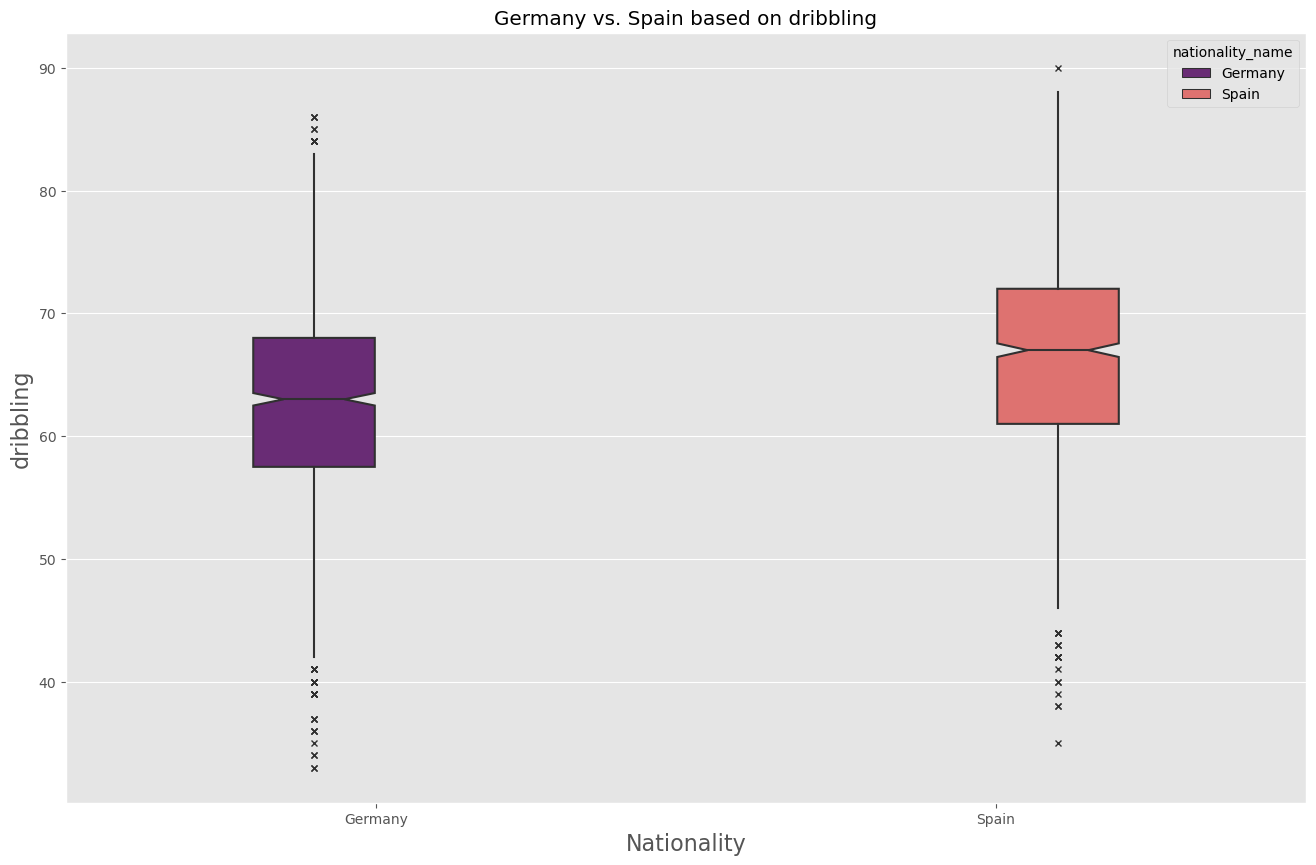

In [140]:
CompareNations('Germany','Spain','dribbling')

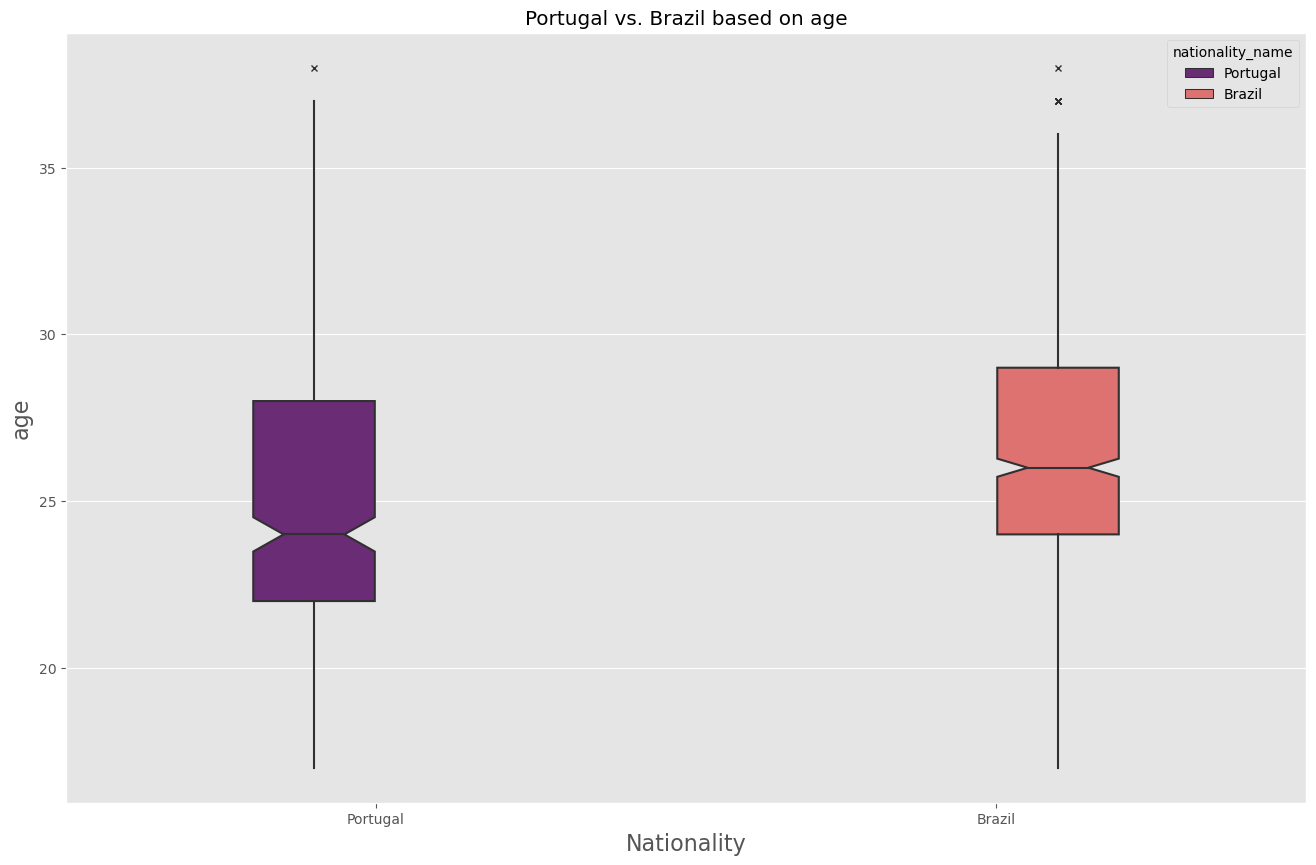

In [141]:
CompareNations('Portugal','Brazil','age')

### **2. CLUB-WISE ANALYSIS :**

#### ***Top 10 clubs based on a certain attribute :***

In [142]:
def top10clubs(attribute):
    df.groupby('club_name')[attribute].mean().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                         color='brown',
                                                                                         width=0.8,
                                                                                         figsize=(16,10)
                                                                               )
    plt.title('TOP 10 CLUBS BASED ON HIGHEST AVERAGE '+ attribute, fontsize=20)
    plt.xlabel("Players' Average "+ attribute, fontsize=18)
    plt.ylabel("Club Names",fontsize=18)
    plt.show()

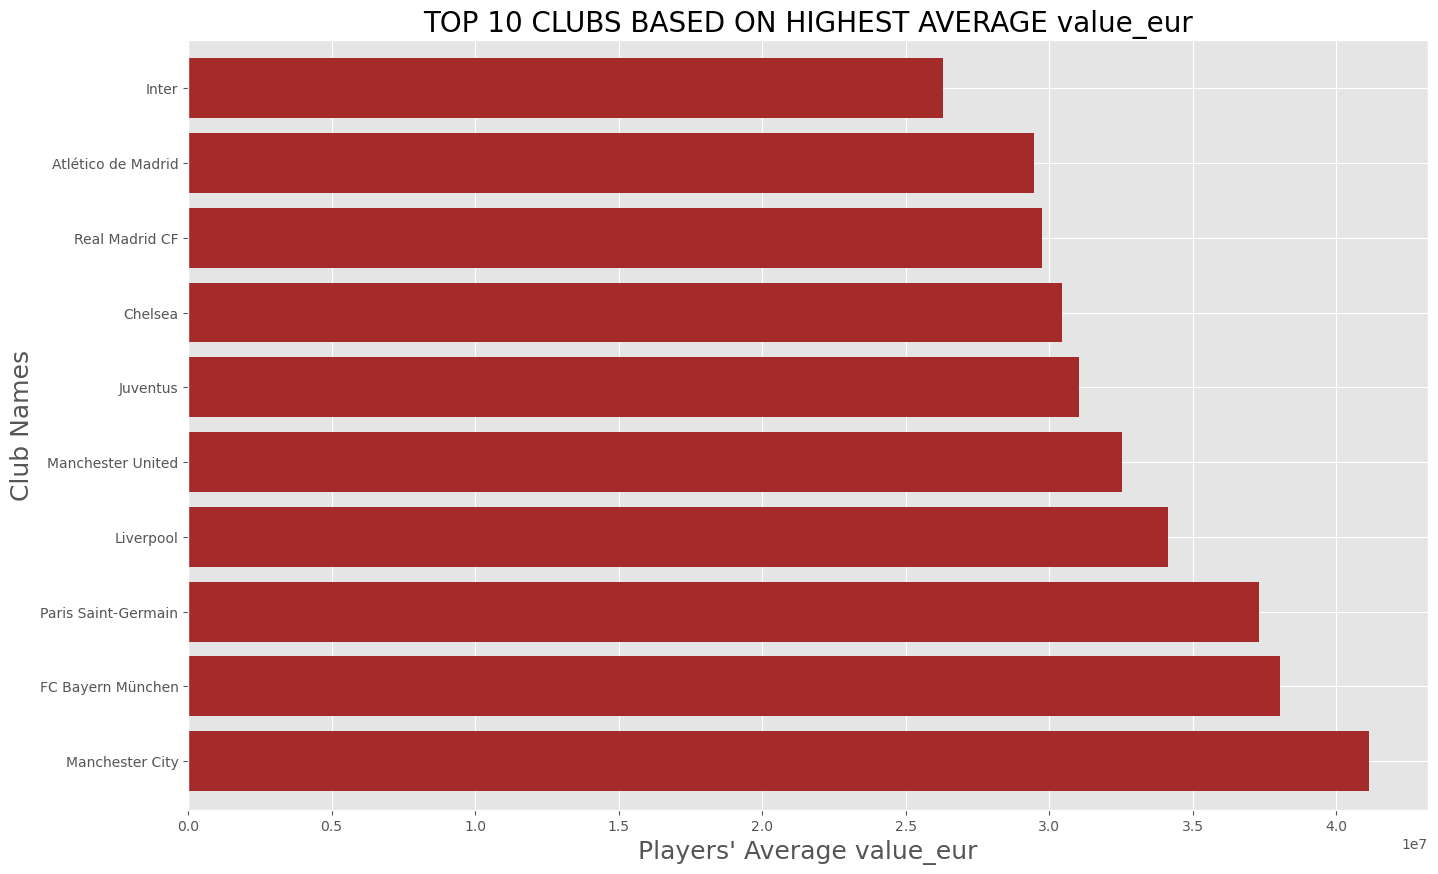

In [143]:
top10clubs('value_eur')

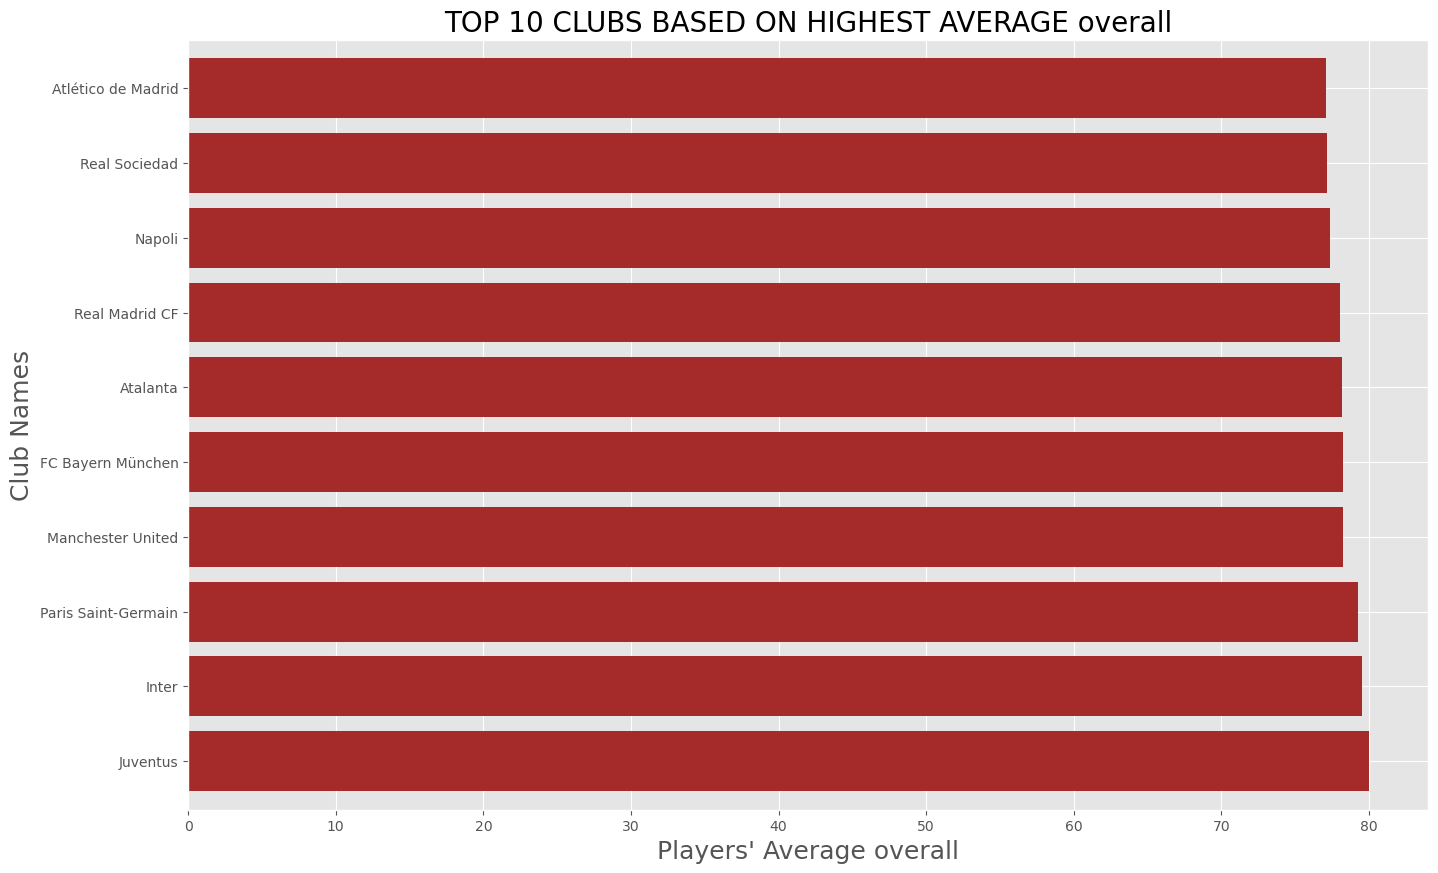

In [144]:
top10clubs('overall')

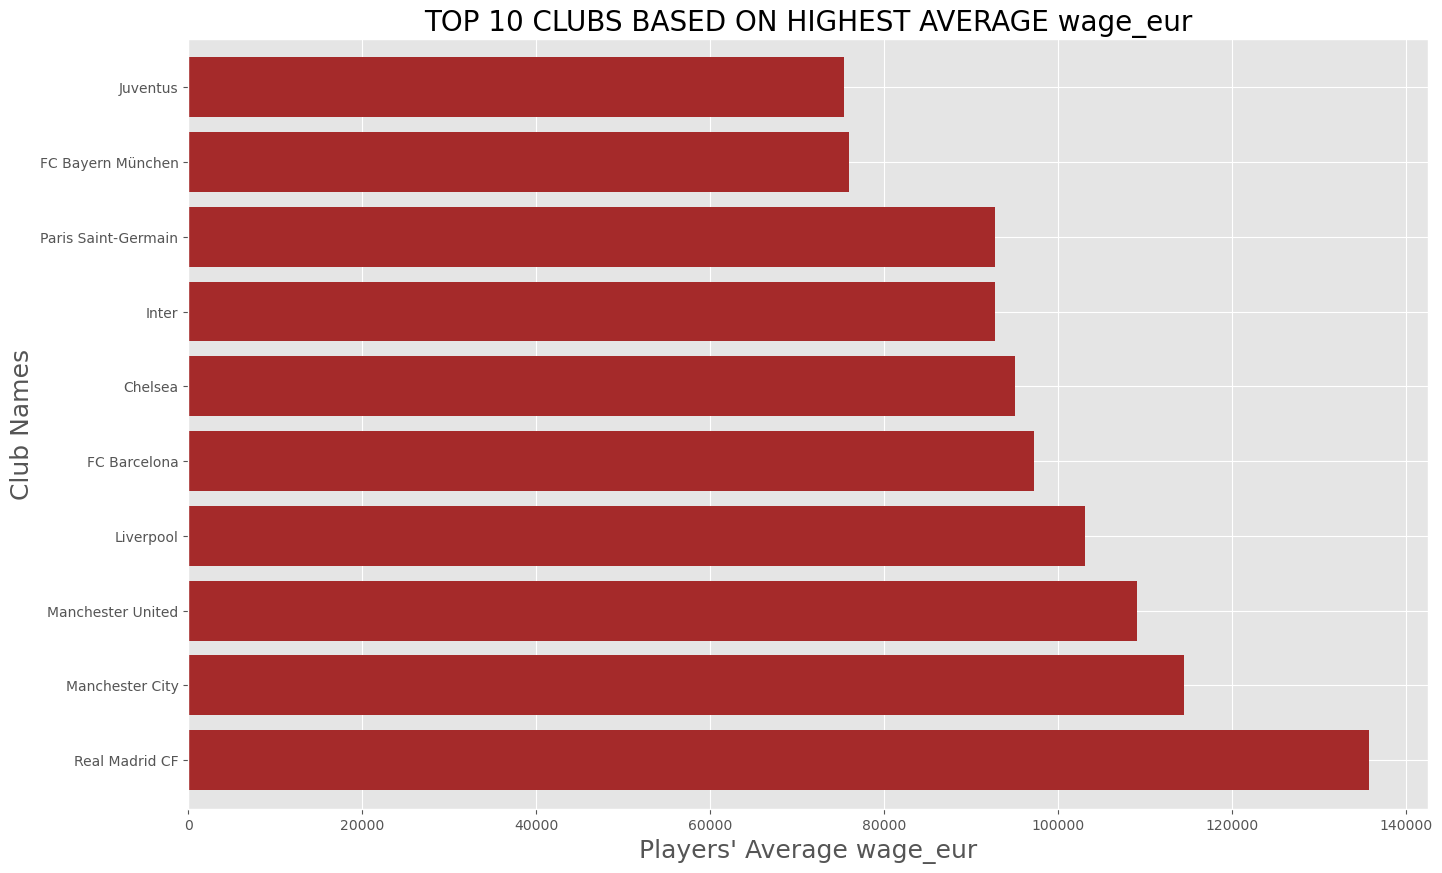

In [145]:
top10clubs('wage_eur')

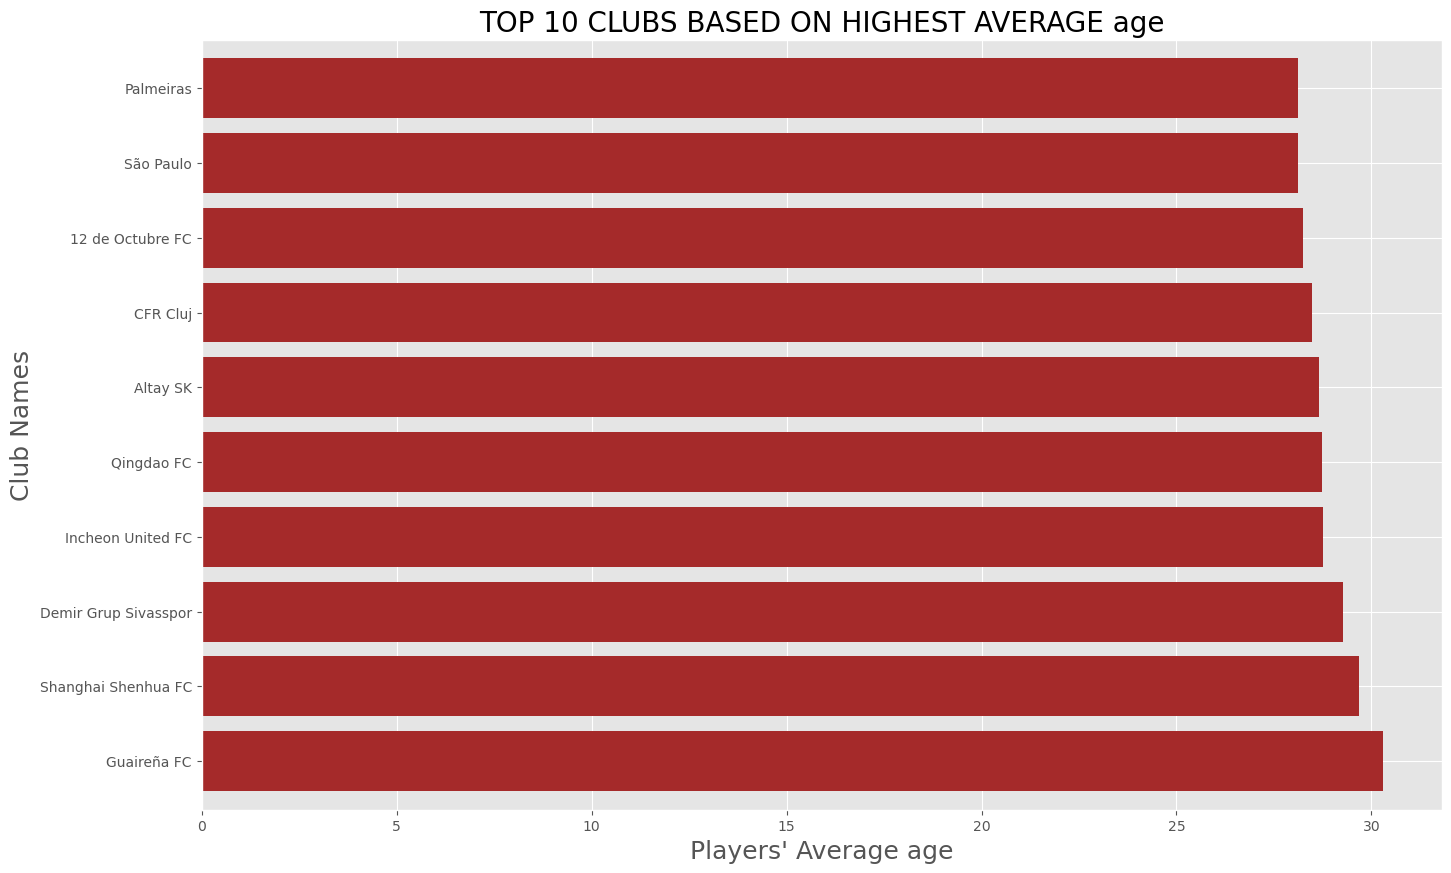

In [146]:
top10clubs('age')

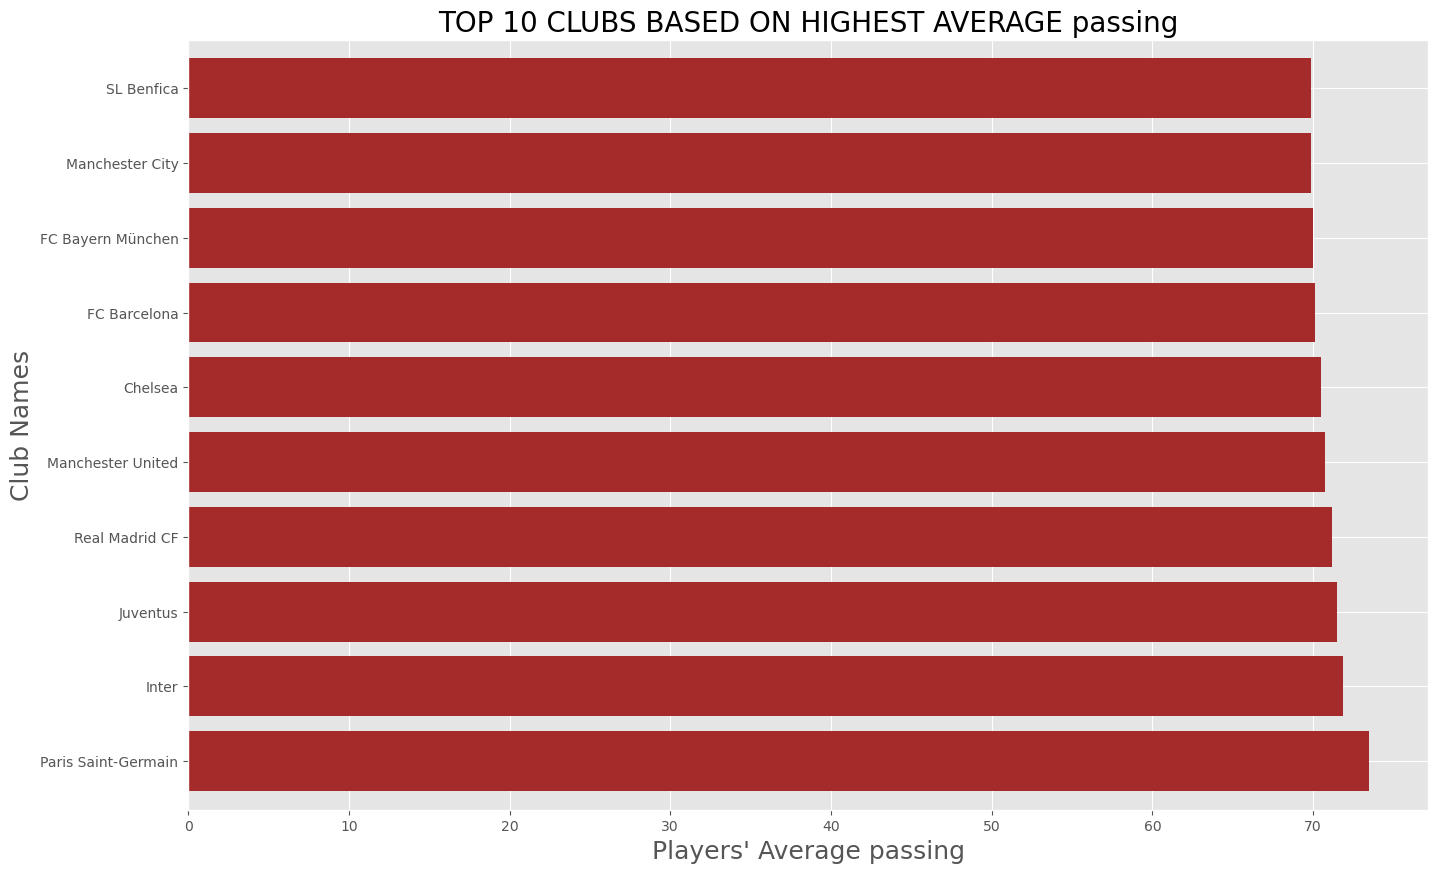

In [147]:
top10clubs('passing')

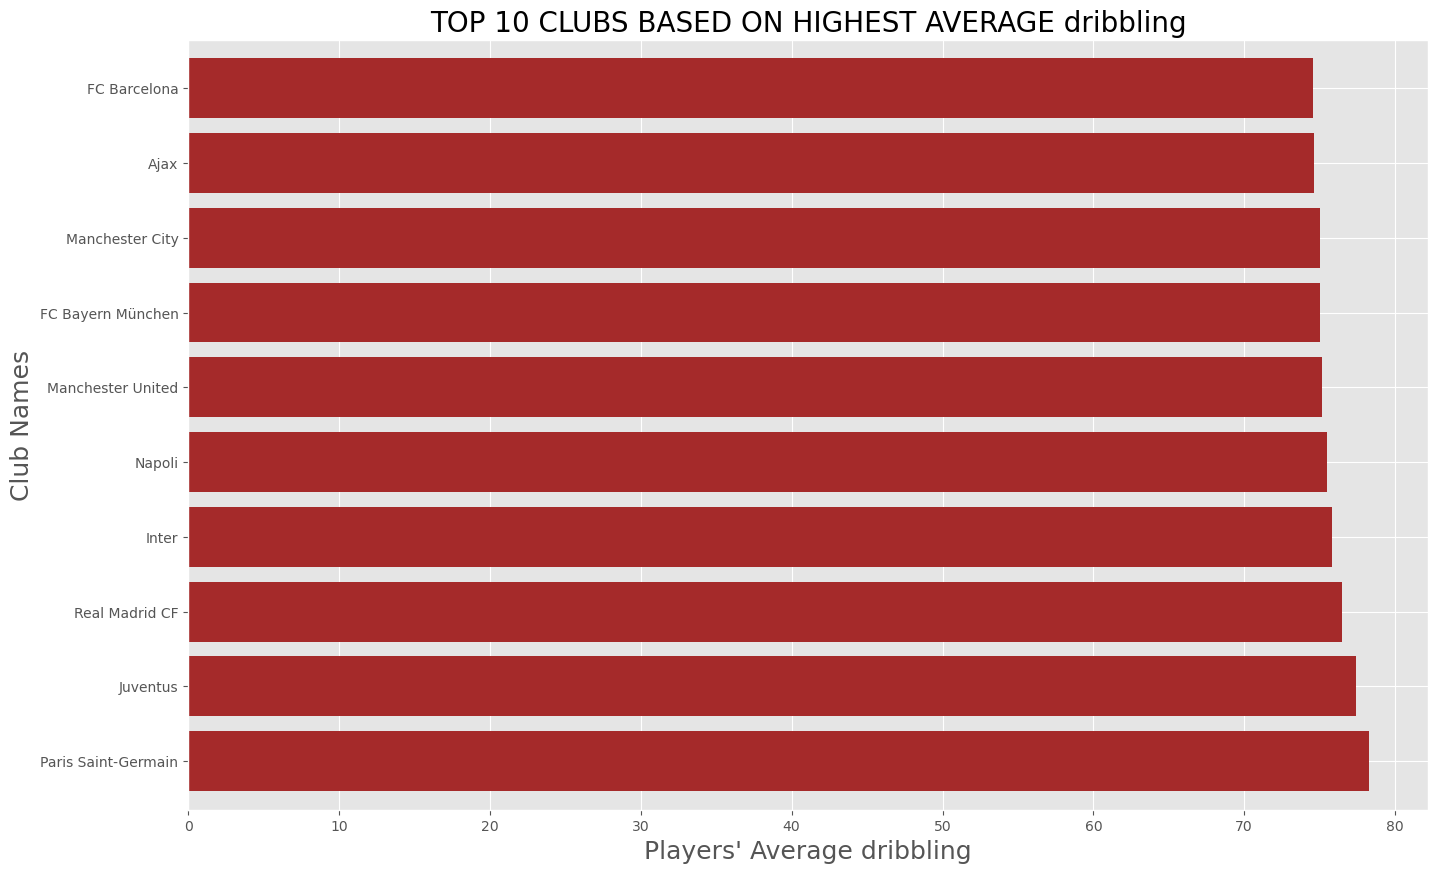

In [148]:
top10clubs('dribbling')

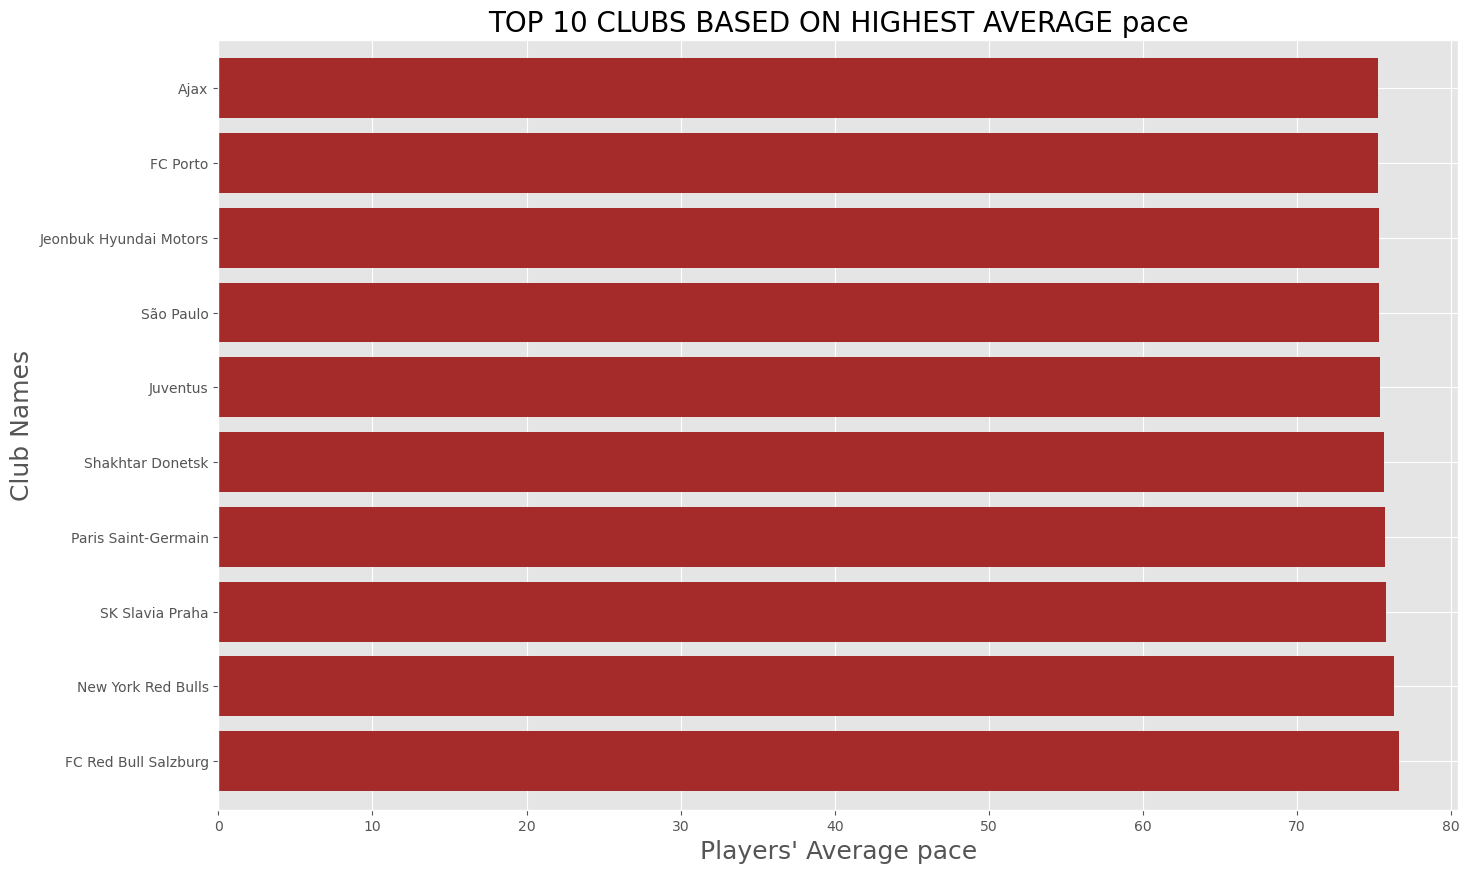

In [149]:
top10clubs('pace')

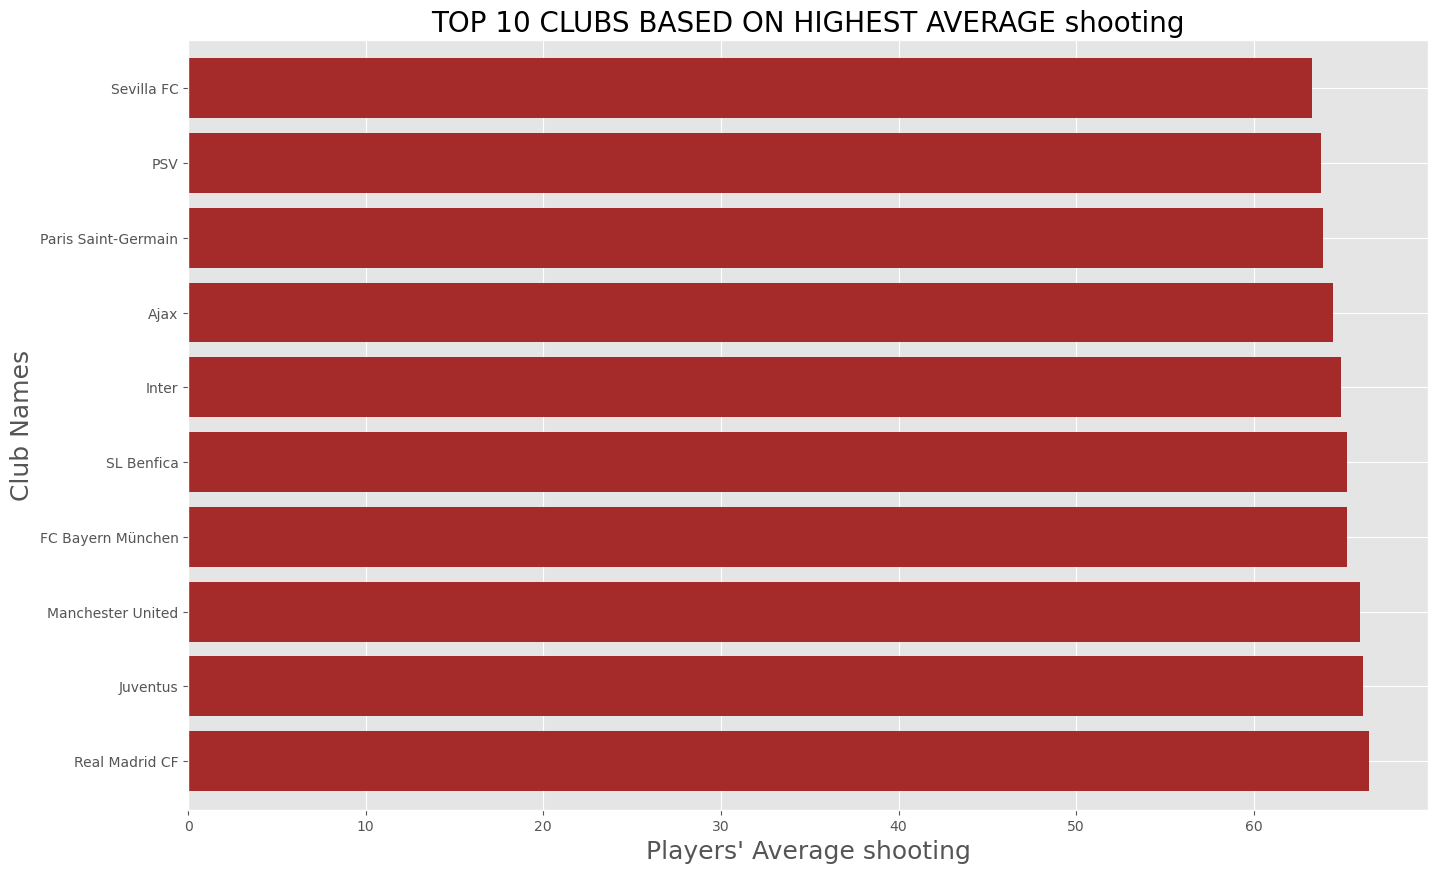

In [150]:
top10clubs('shooting')

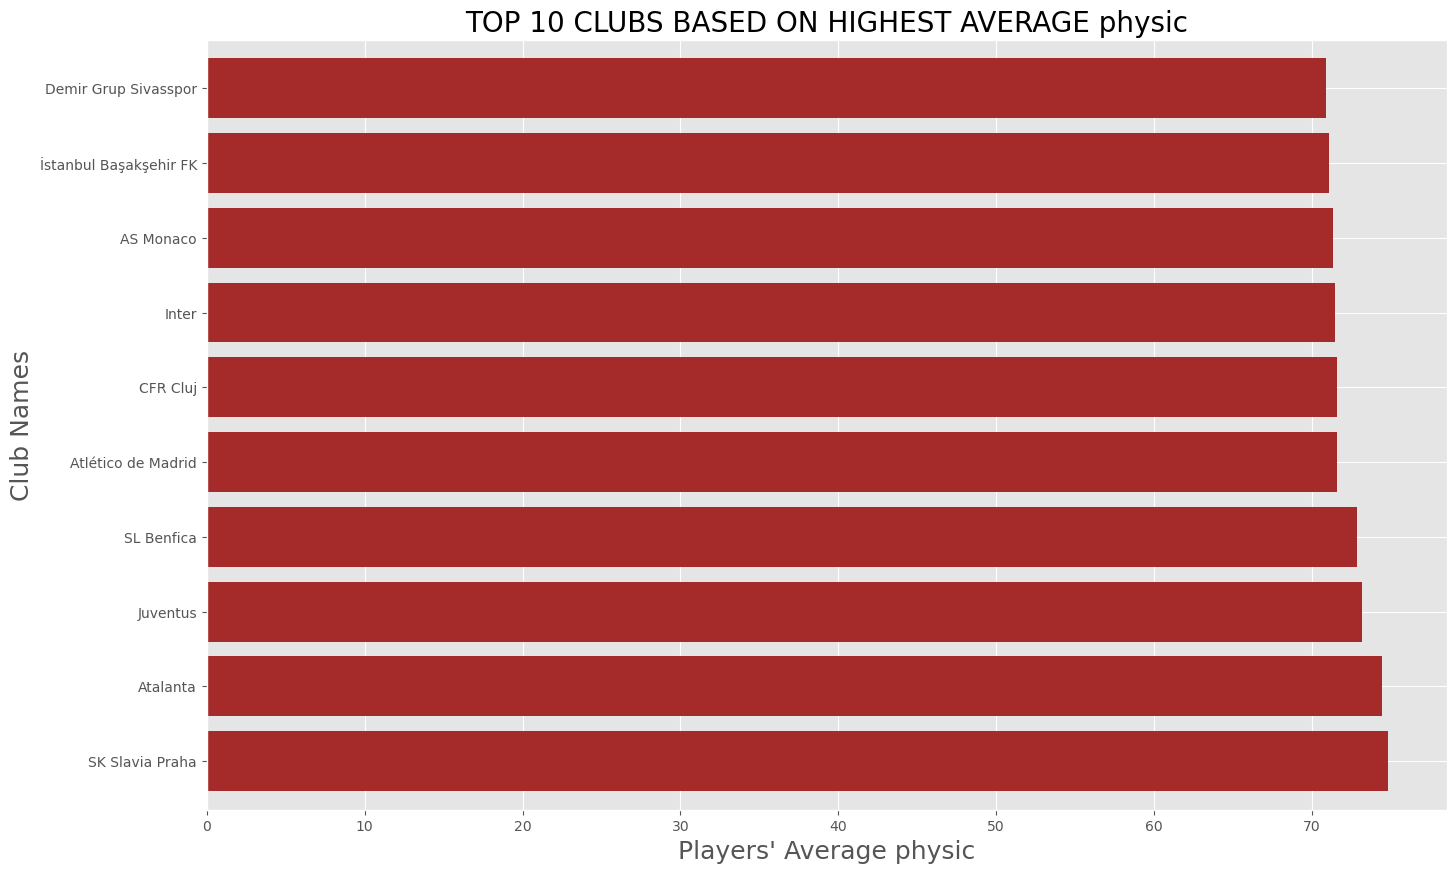

In [151]:
top10clubs('physic')

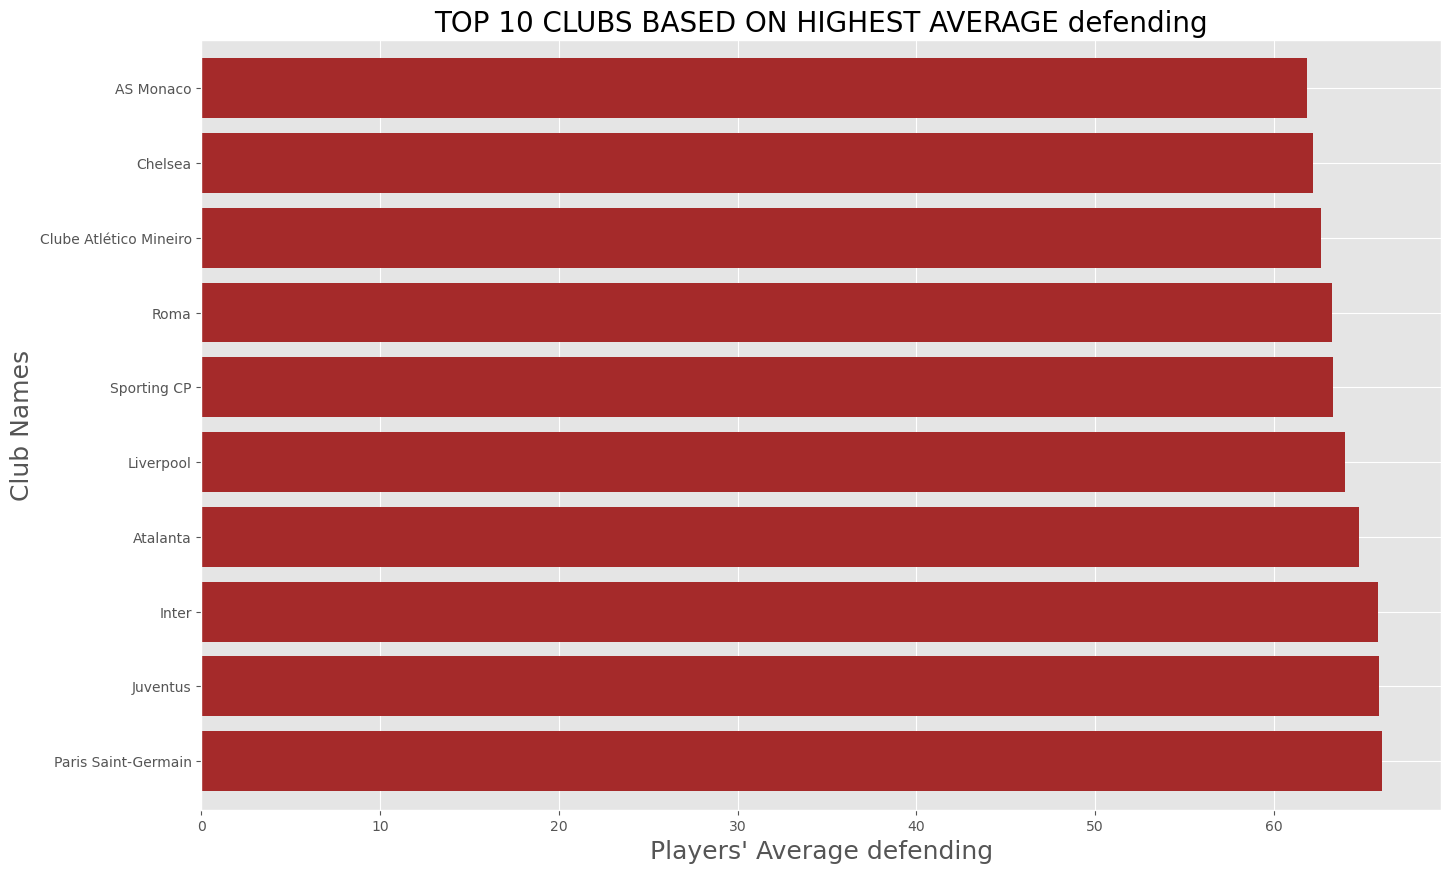

In [152]:
top10clubs('defending')

#### ***Top 5 Clubs of LaLiga, SerieA, Bundesliga and Premier League.***

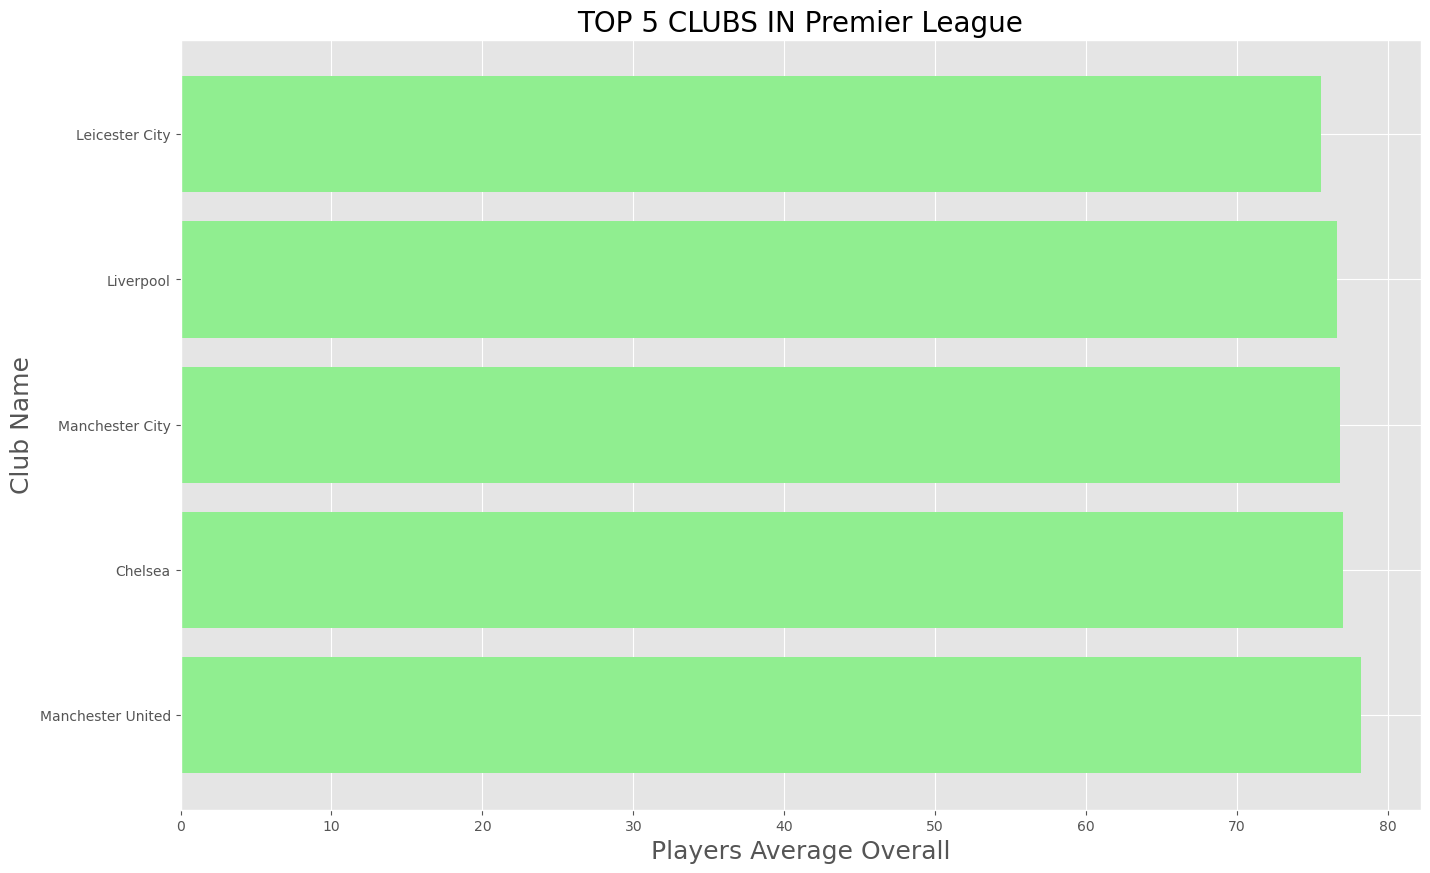

In [153]:
df.query("league_name== 'English Premier League'").groupby('club_name')['overall'].mean().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                                   color='lightgreen',
                                                                                                                                   width=0.8,
                                                                                                                                   figsize=(16,10)
                                                                                                                                  )                                                                                                                                   
                                                                                                                                   
plt.title("TOP 5 CLUBS IN Premier League",fontsize=20)
                                                                                                                                   
plt.xlabel('Players Average Overall', fontsize=18)
plt.ylabel('Club Name', fontsize=18)
plt.show()

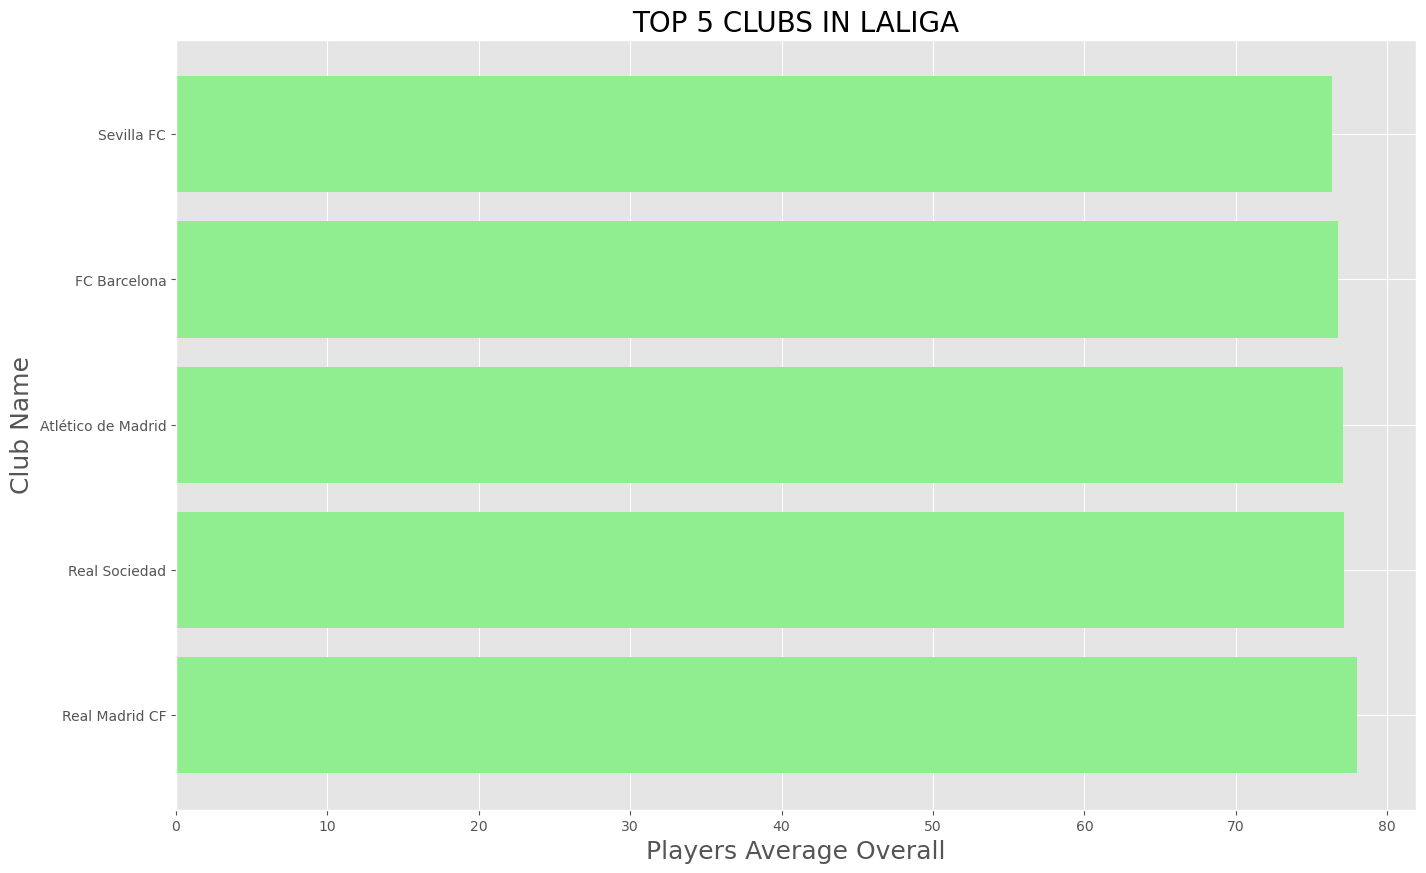

In [154]:
df.query("league_name== 'Spain Primera Division'").groupby('club_name')['overall'].mean().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                                   color='lightgreen',
                                                                                                                                   width=0.8,
                                                                                                                                   figsize=(16,10)
                                                                                                                                  )                                                                                                                                   
                                                                                                                                   
plt.title("TOP 5 CLUBS IN LALIGA",fontsize=20)
                                                                                                                                   
plt.xlabel('Players Average Overall', fontsize=18)
plt.ylabel('Club Name', fontsize=18)
plt.show()

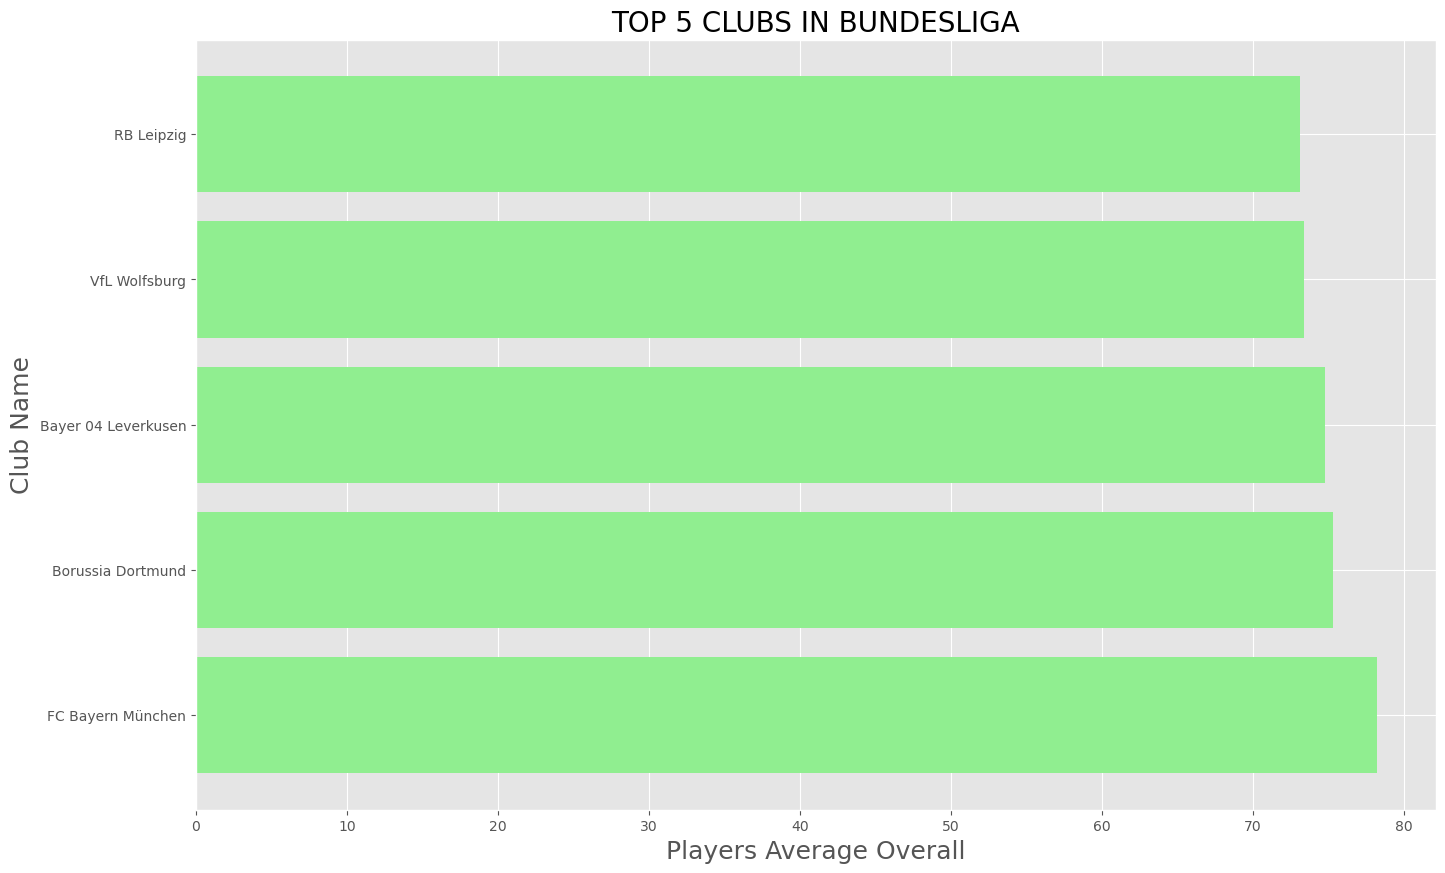

In [155]:
#'German 1. Bundesliga', 'English Premier League','Spain Primera Division', 'Italian Serie A'
#Top 5 clubs of each league based on overall.

df.query("league_name== 'German 1. Bundesliga'").groupby('club_name')['overall'].mean().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                                   color='lightgreen',
                                                                                                                                   width=0.8,
                                                                                                                                   figsize=(16,10)
                                                                                                                                  )                                                                                                                                   
                                                                                                                                   
plt.title("TOP 5 CLUBS IN BUNDESLIGA",fontsize=20)
                                                                                                                                   
plt.xlabel('Players Average Overall', fontsize=18)
plt.ylabel('Club Name', fontsize=18)
plt.show()
    

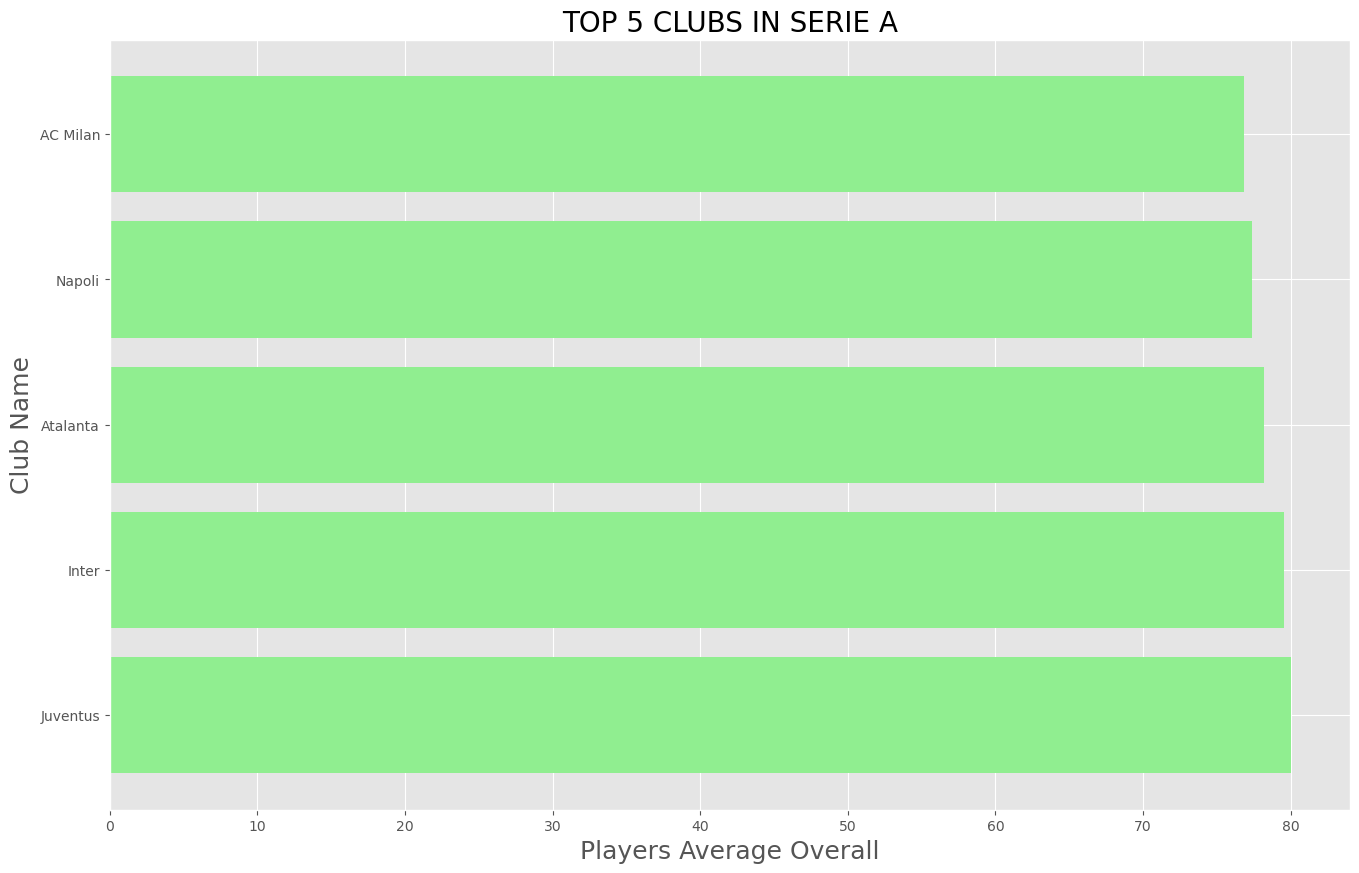

In [156]:
df.query("league_name== 'Italian Serie A'").groupby('club_name')['overall'].mean().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                                   color='lightgreen',
                                                                                                                                   width=0.8,
                                                                                                                                   figsize=(16,10)
                                                                                                                                  )                                                                                                                                   
                                                                                                                                   
plt.title("TOP 5 CLUBS IN SERIE A",fontsize=20)
                                                                                                                                   
plt.xlabel('Players Average Overall', fontsize=18)
plt.ylabel('Club Name', fontsize=18)
plt.show()

#### One for Indian Super League as well...

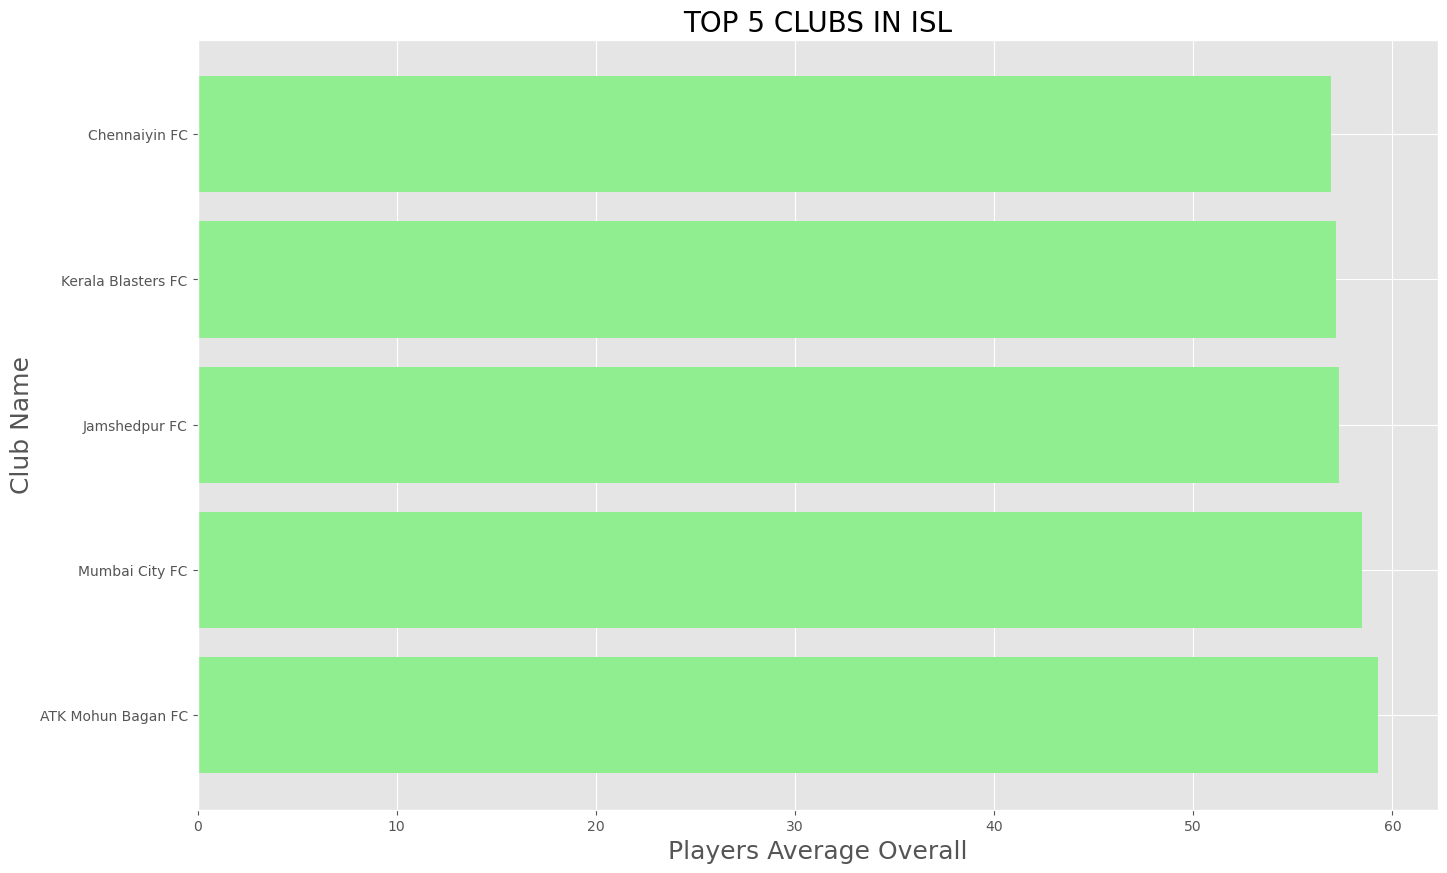

In [157]:
df.query("league_name== 'Indian Super League'").groupby('club_name')['overall'].mean().sort_values(ascending=False).head(5).plot(kind='barh',
                                                                                                                                   color='lightgreen',
                                                                                                                                   width=0.8,
                                                                                                                                   figsize=(16,10)
                                                                                                                                  )                                                                                                                                   
                                                                                                                                   
plt.title("TOP 5 CLUBS IN ISL",fontsize=20)
                                                                                                                                   
plt.xlabel('Players Average Overall', fontsize=18)
plt.ylabel('Club Name', fontsize=18)
plt.show()

#### **Comparing 2 Clubs based on certain features:**

In [158]:
def CompareClubs(club1,club2,feature):
    if club1 == club2:
        print("Enter Different Club Names!")
        
    else:
        plt.figure(figsize=(16,10))
        plt.title(club1+" vs. "+club2+" based on "+ feature)
        
        df_club1= df.loc[df['club_name']==club1]
        df_club2= df.loc[df['club_name']==club2]
        df_clubs= pd.concat([df_club1,df_club2])
        
        sns.boxplot(data=df_clubs,
                   x='club_name',
                   y=feature,
                   hue='club_name',
                   palette='viridis',
                   width=0.4,
                   notch=True,
                   showcaps=False,
                   flierprops={"marker":"x"})
        
        plt.xlabel("Club",fontsize=16)
        plt.ylabel(feature,fontsize=16)
        plt.show();

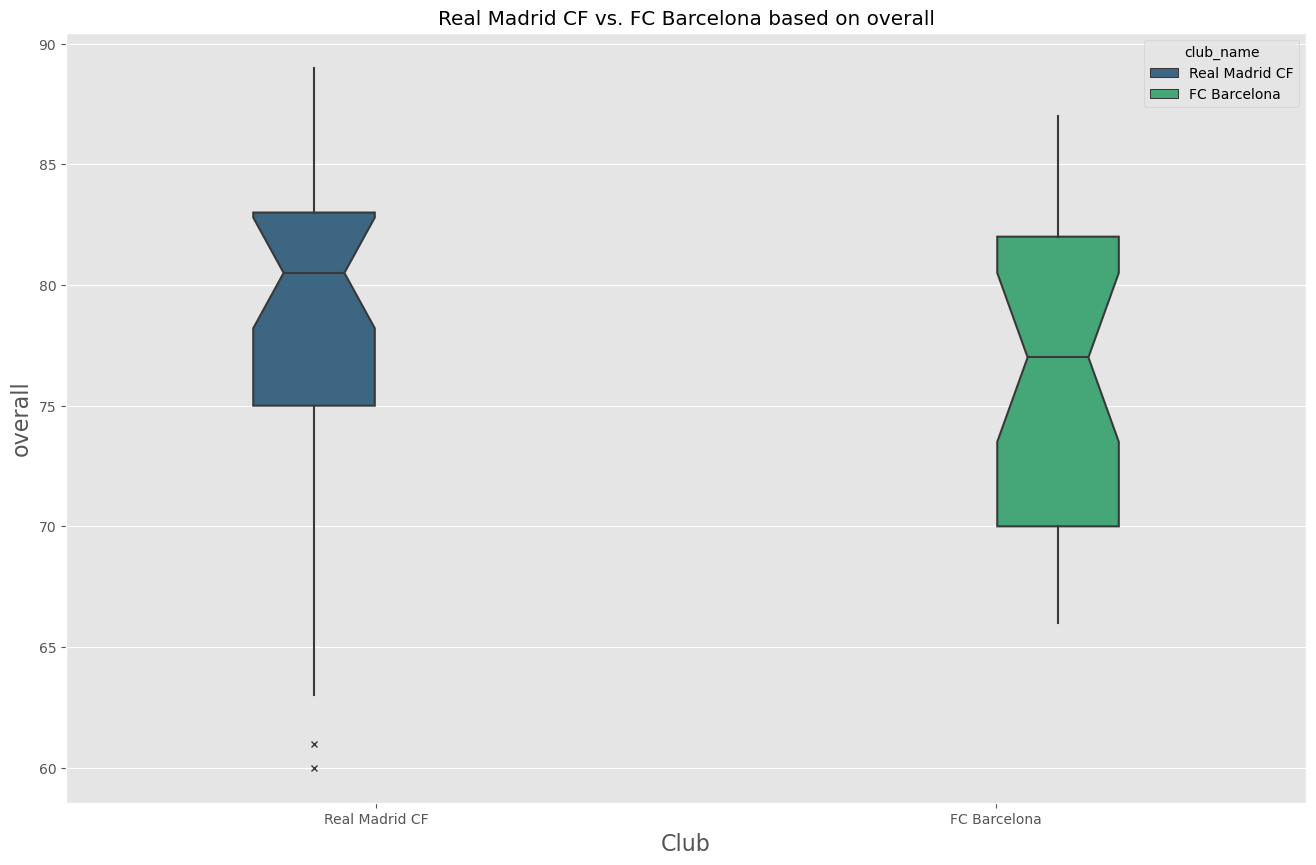

In [159]:
CompareClubs('Real Madrid CF','FC Barcelona','overall')

**HALA MADRID ! <3**

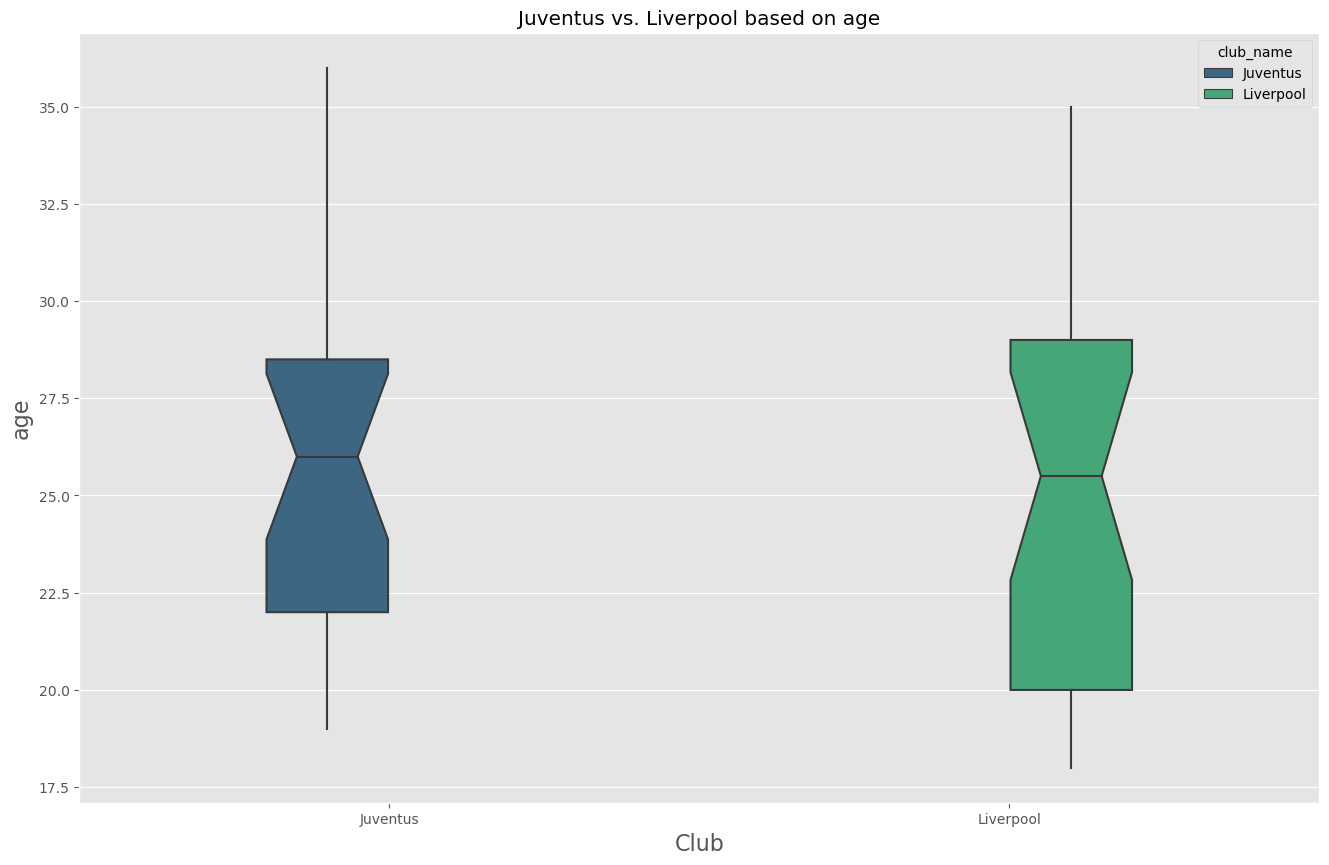

In [160]:
CompareClubs('Juventus','Liverpool','age')

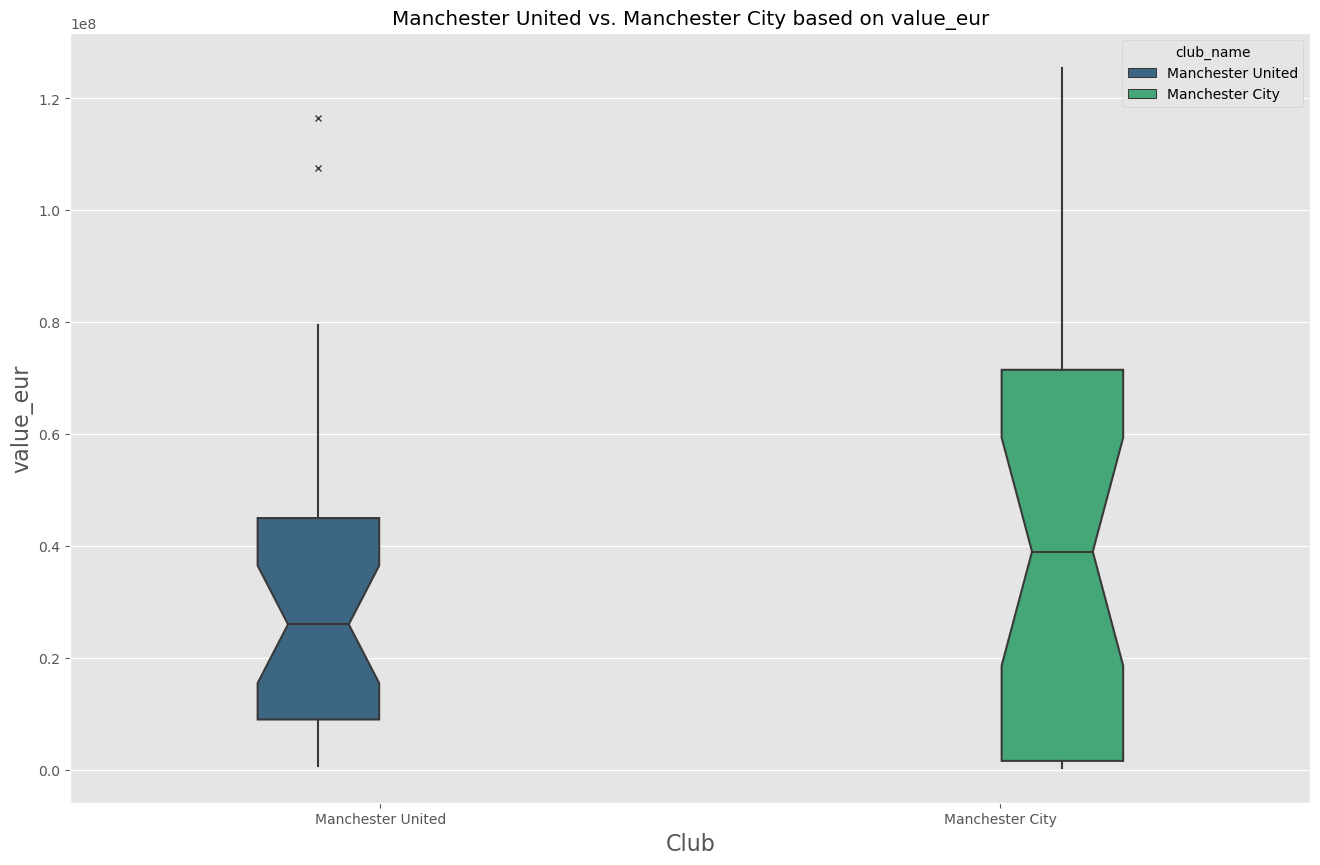

In [161]:
CompareClubs('Manchester United', 'Manchester City', 'value_eur')

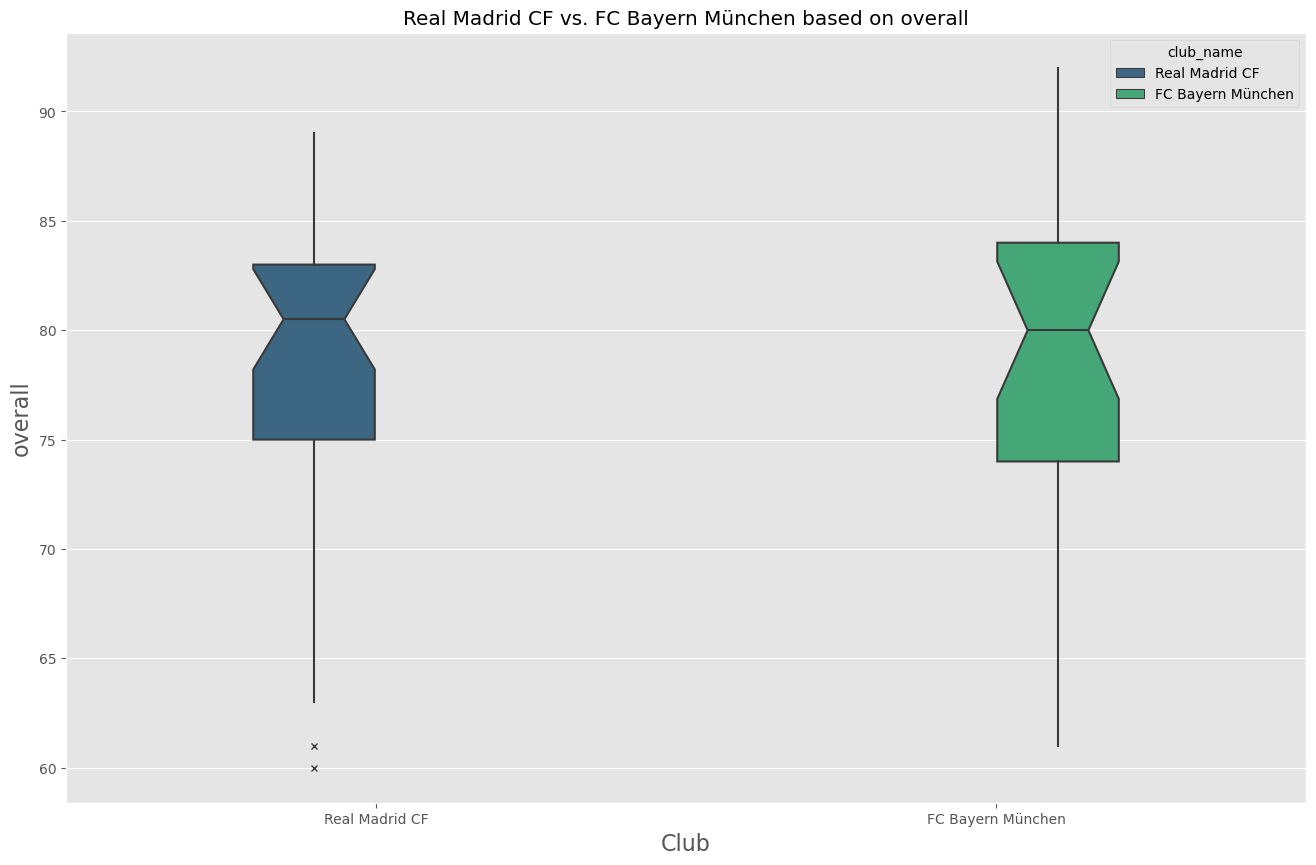

In [162]:
CompareClubs('Real Madrid CF','FC Bayern München','overall')

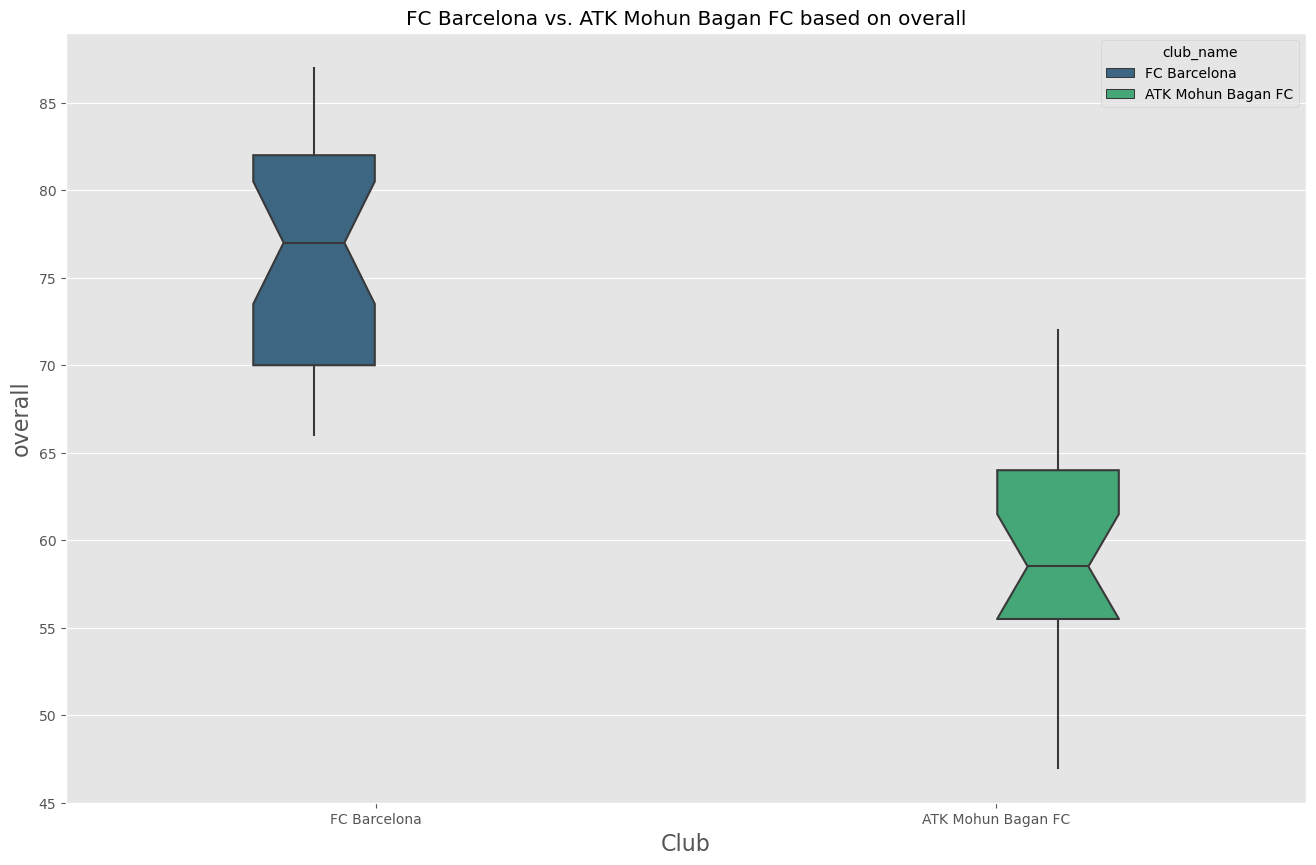

In [163]:
CompareClubs('FC Barcelona','ATK Mohun Bagan FC','overall')

The stark difference in levels of the best European teams and best Indian teams !!

### **3. PLAYER WISE ANALYSIS:**

In [164]:
def Top5players(feature):
    df.groupby('short_name')[feature].mean().sort_values(ascending=False).head(5).plot(kind='barh',color='orange',
                                                                                     width=0.7,figsize=(16,10) ) 
    plt.title("TOP 5 PLAYERS BASED ON "+feature,fontsize=20)
                                                                                                                                   
    plt.xlabel(feature, fontsize=18)
    plt.ylabel('Player Name', fontsize=18)
    plt.show()

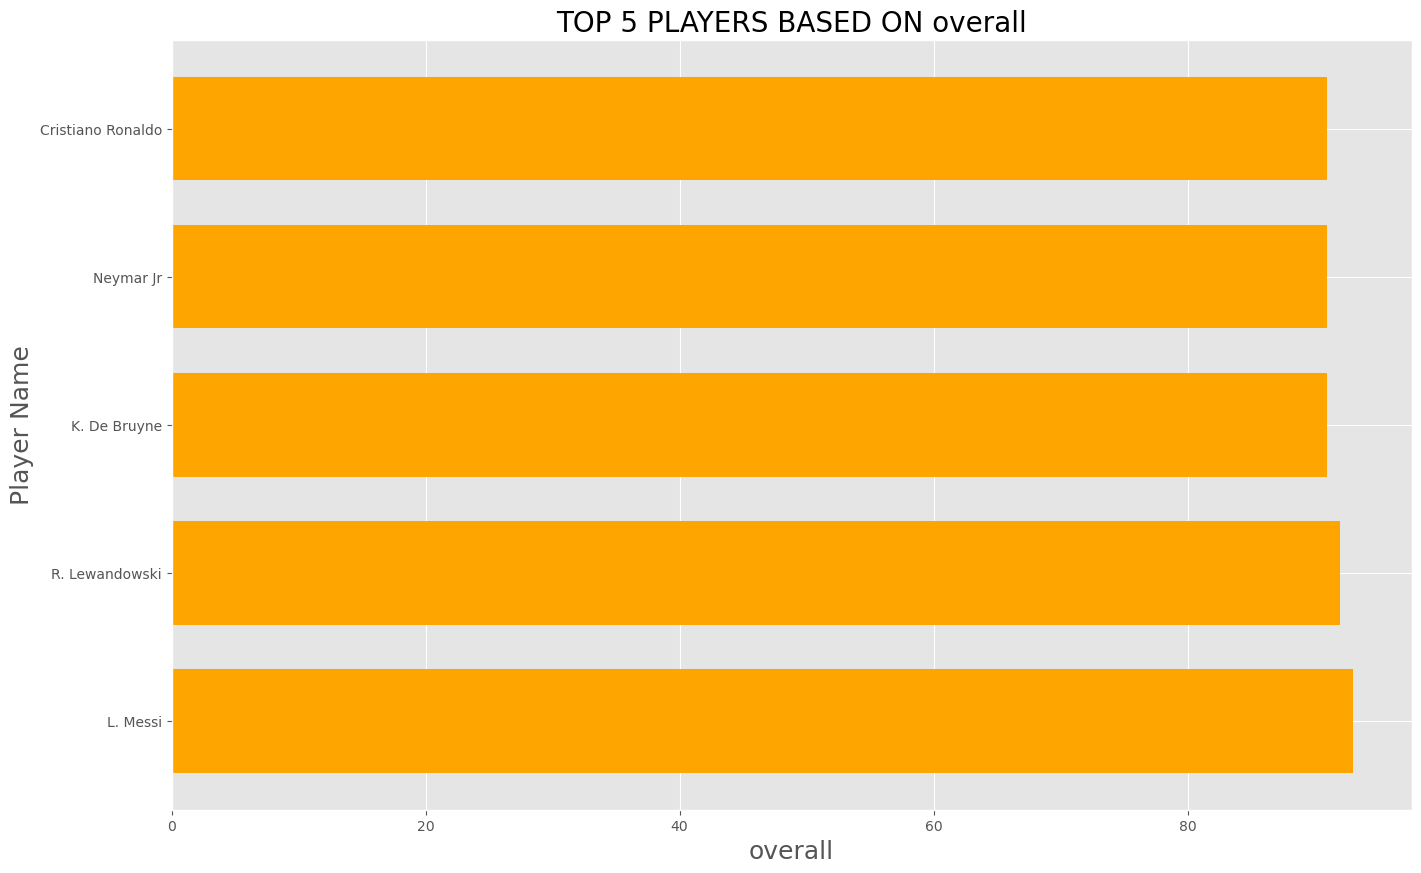

In [165]:
Top5players('overall')

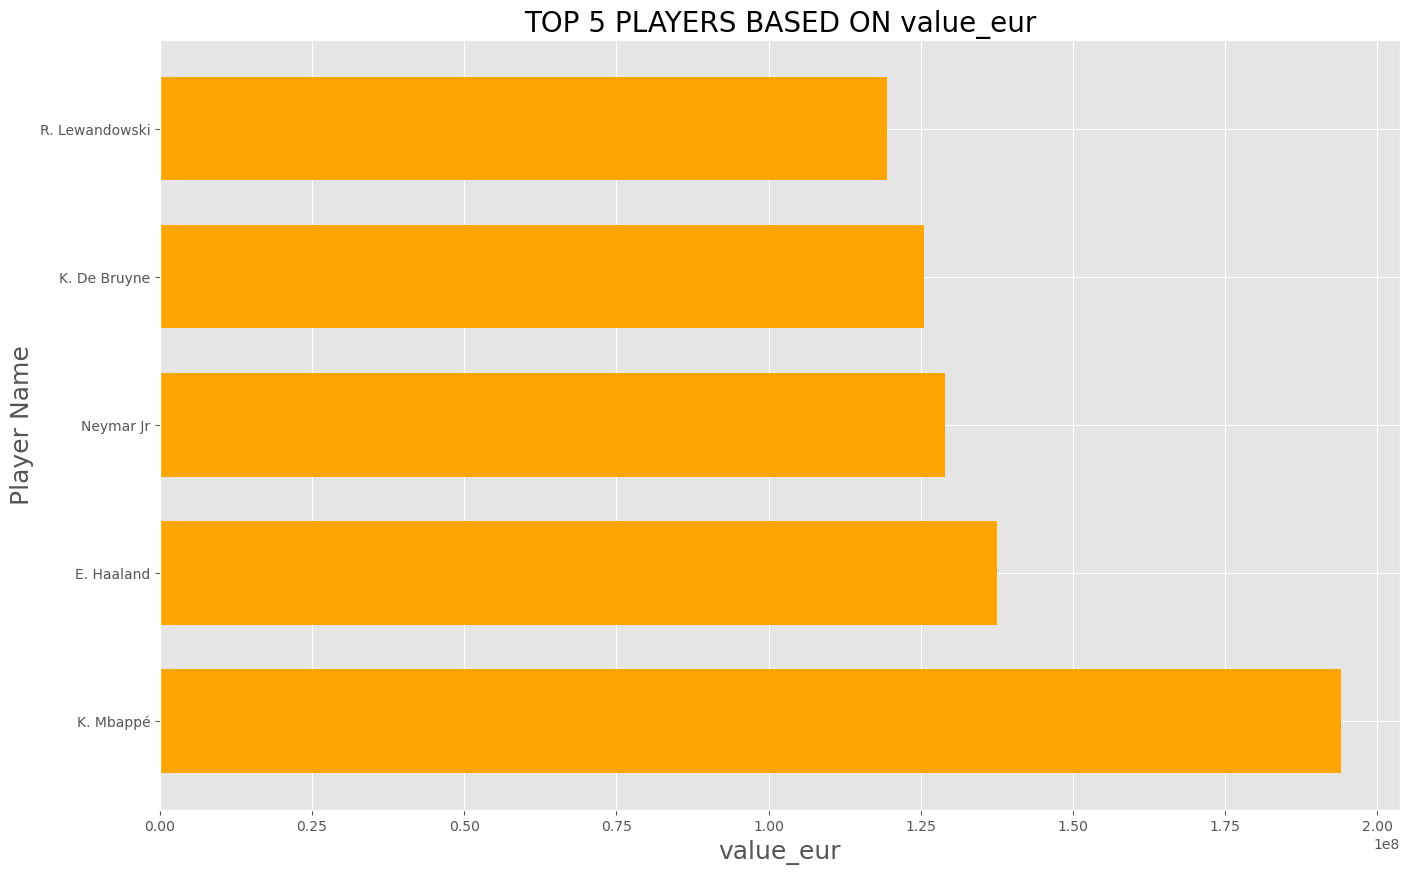

In [166]:
Top5players('value_eur')

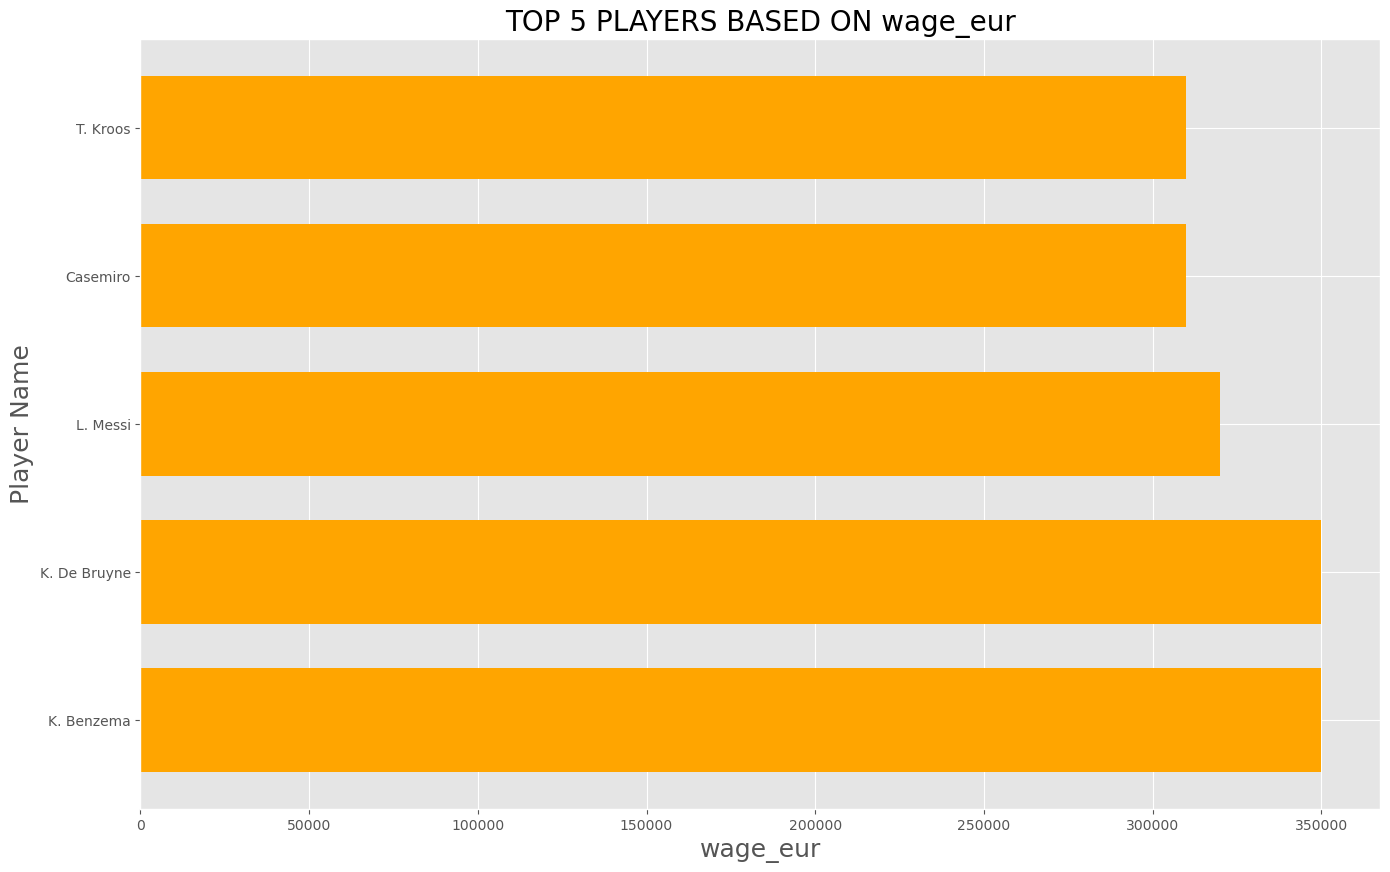

In [167]:
Top5players('wage_eur')

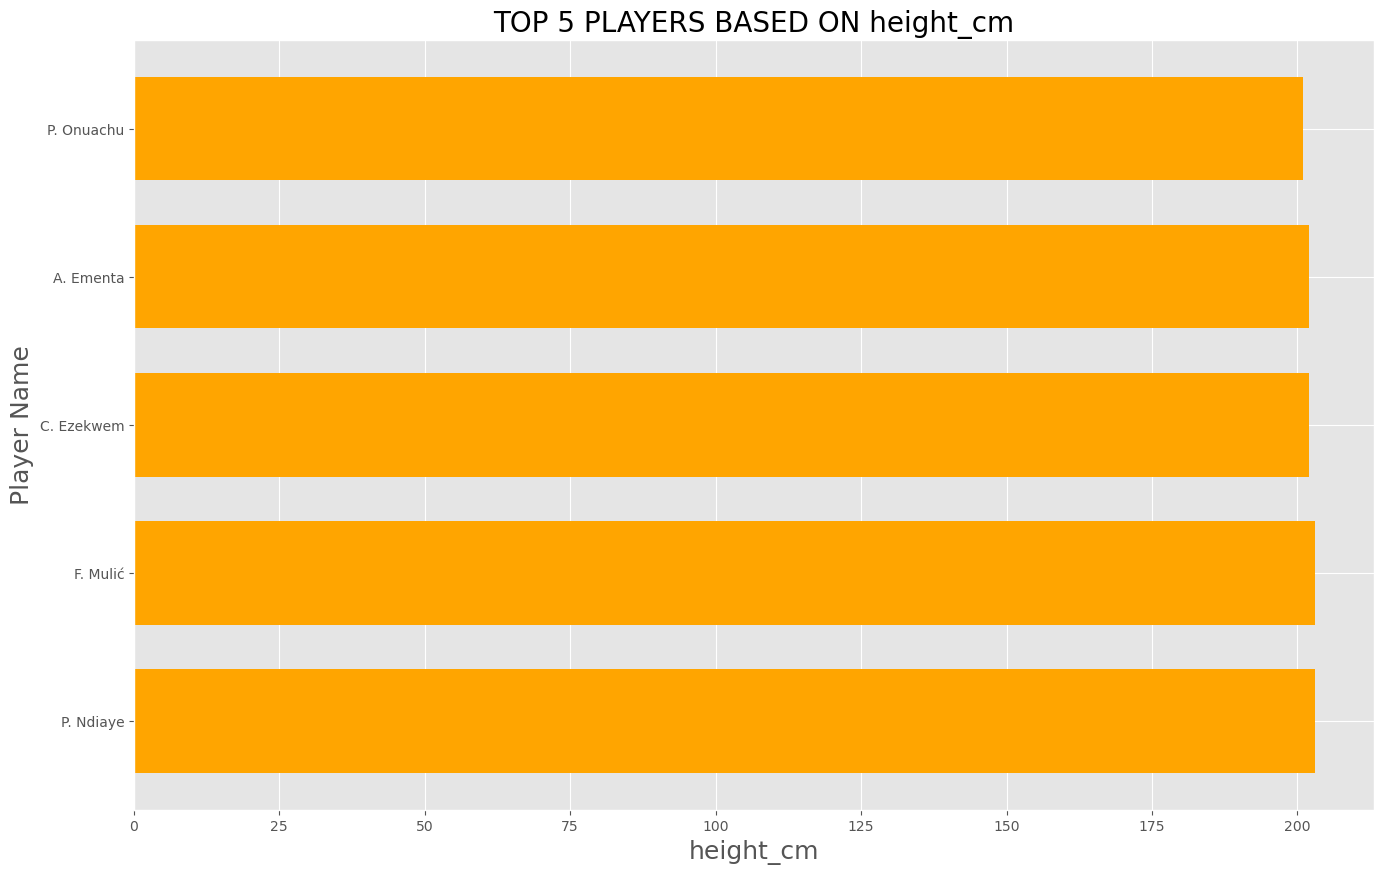

In [168]:
Top5players('height_cm')

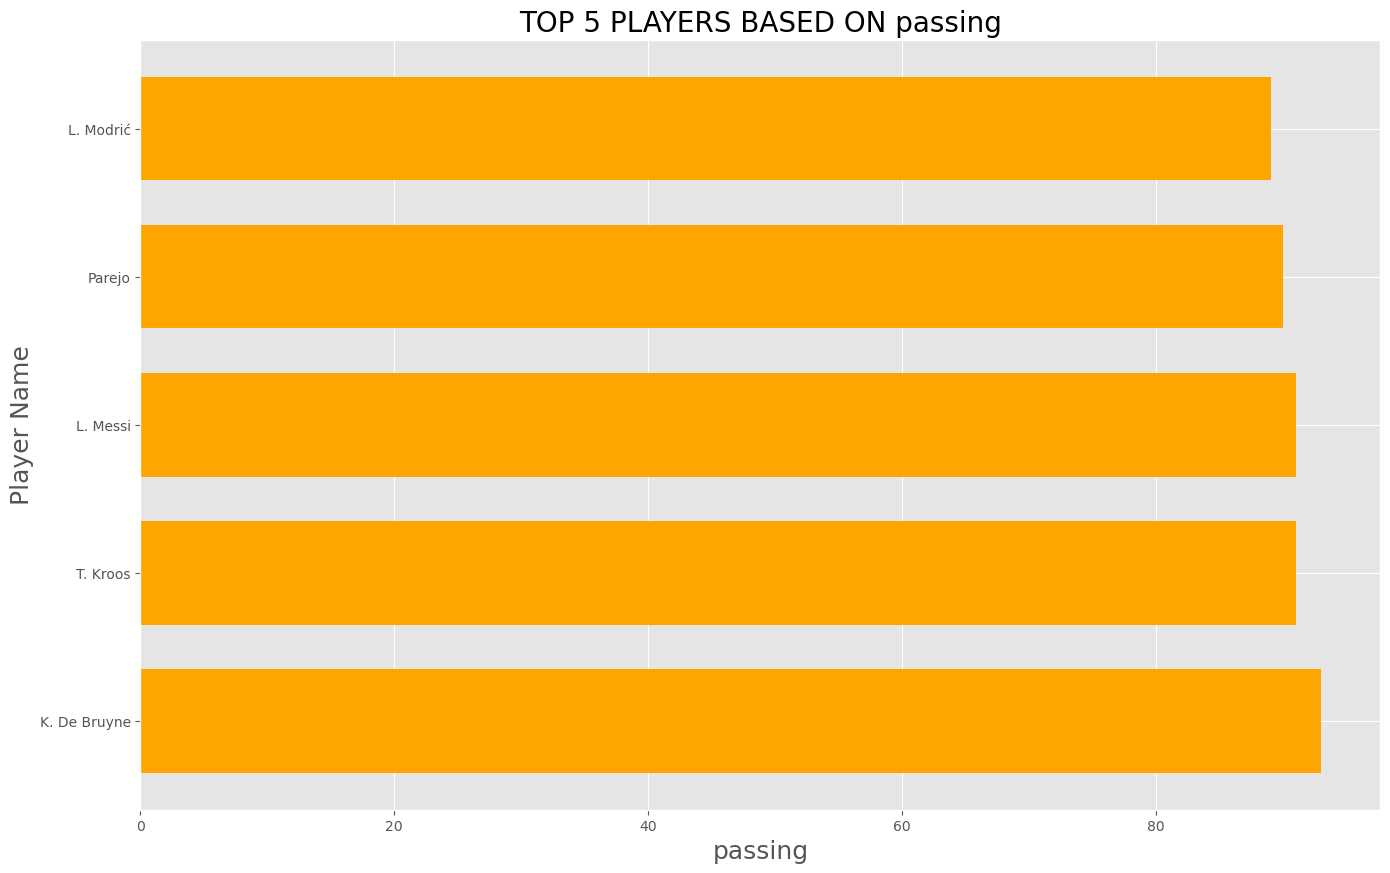

In [169]:
Top5players('passing')

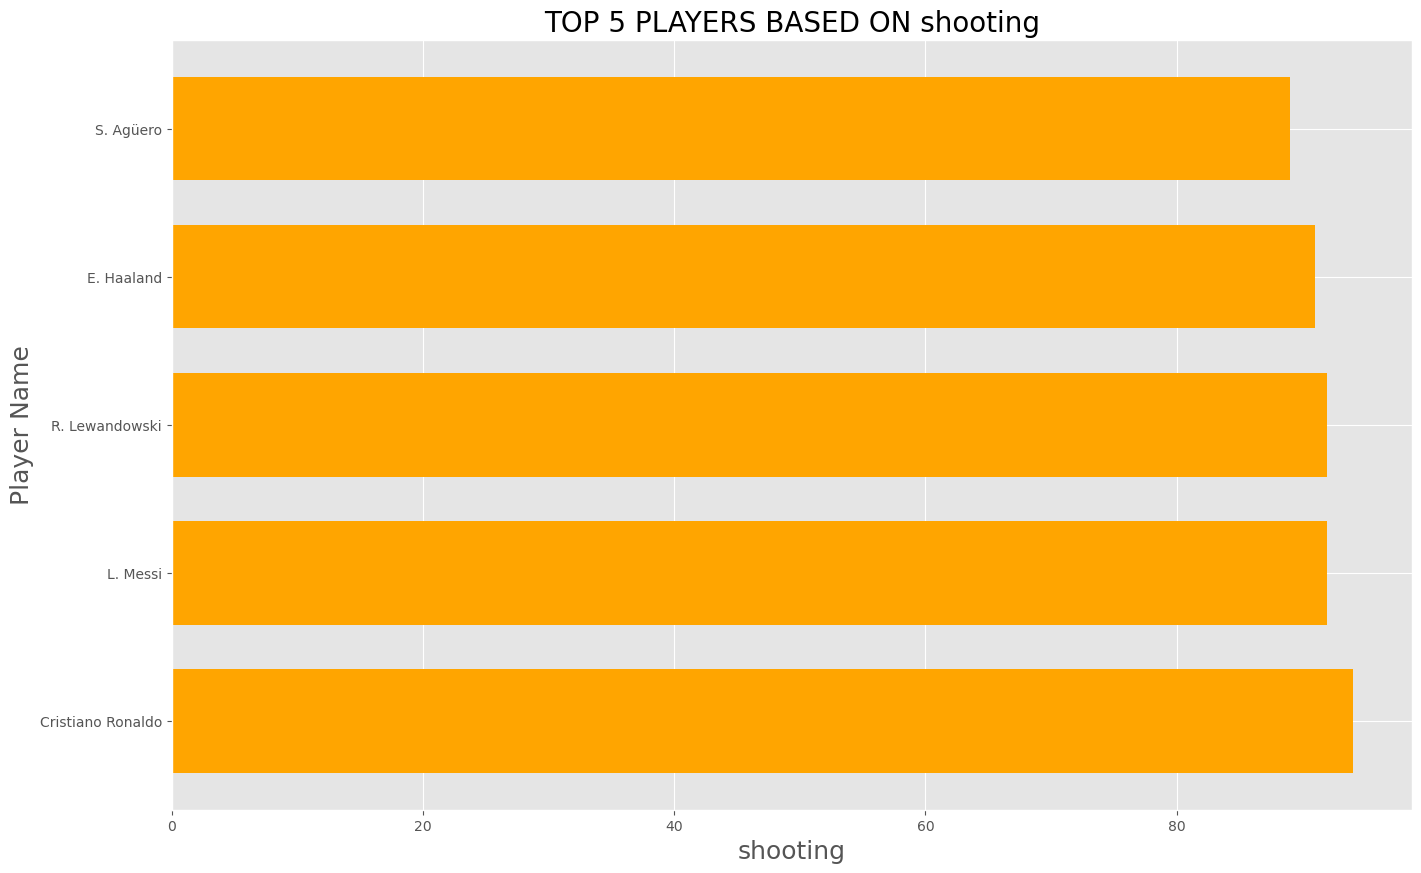

In [170]:
Top5players('shooting')

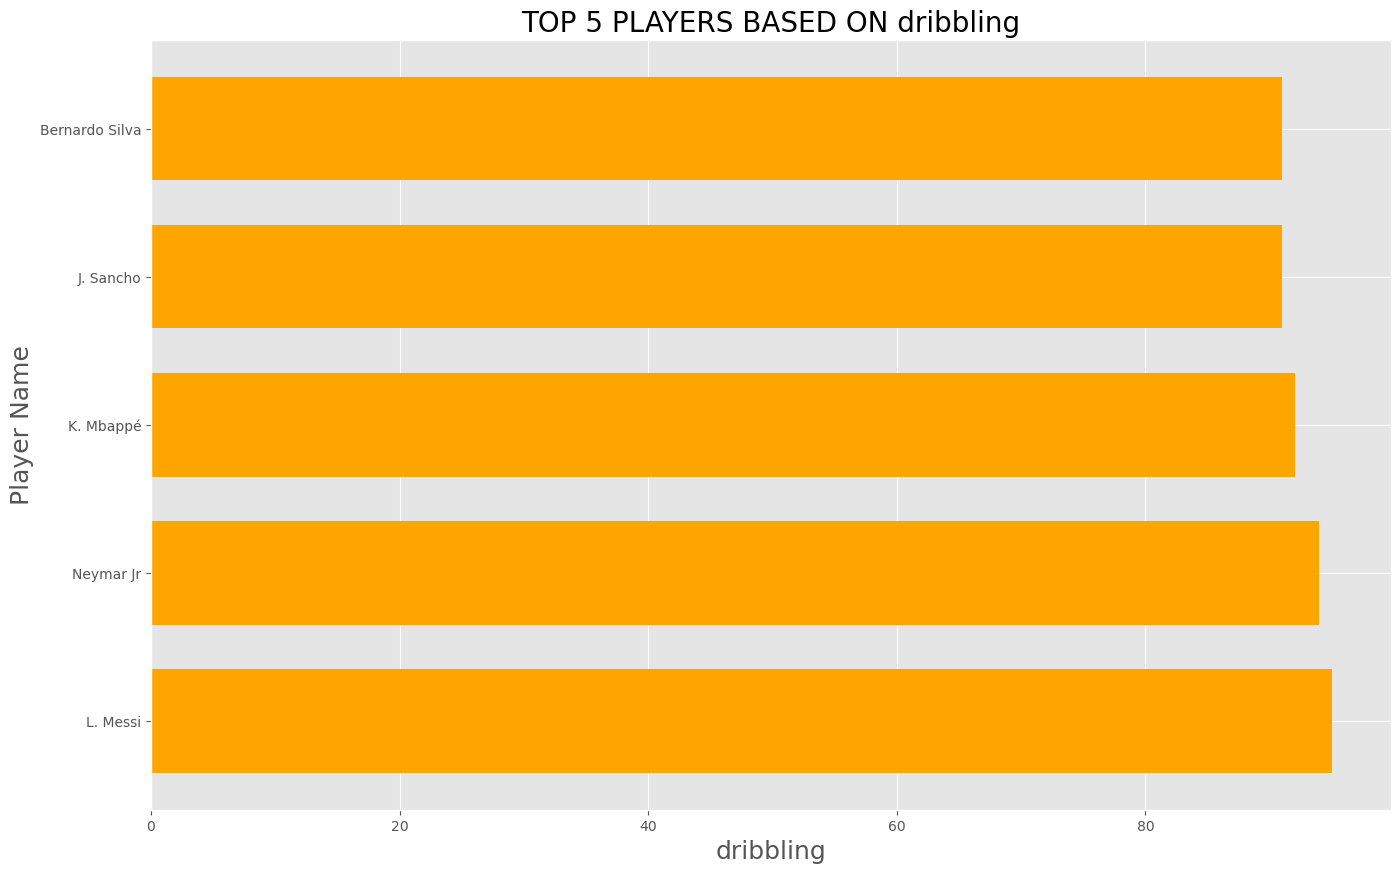

In [171]:
Top5players('dribbling')

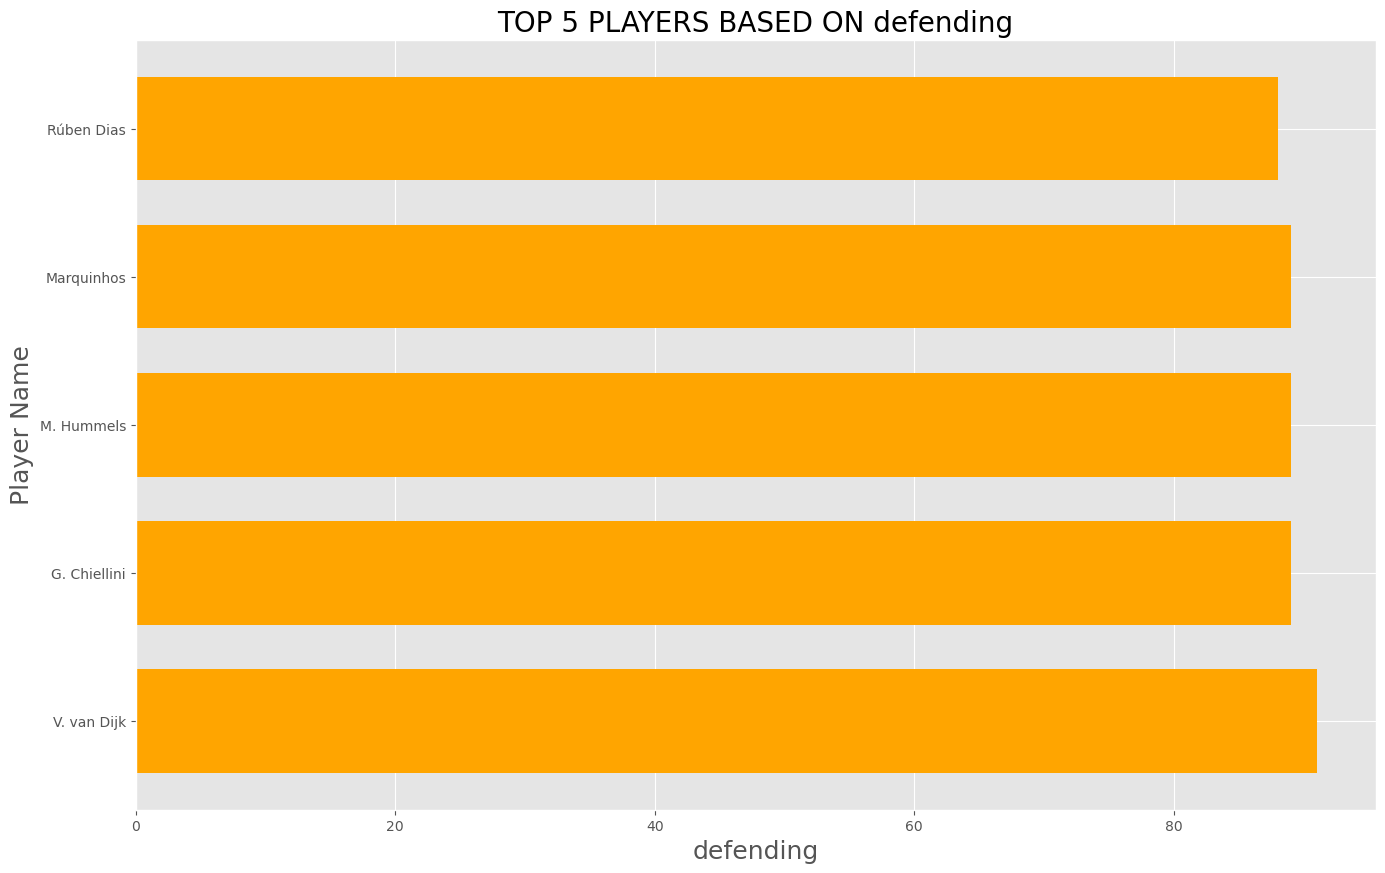

In [172]:
Top5players('defending')

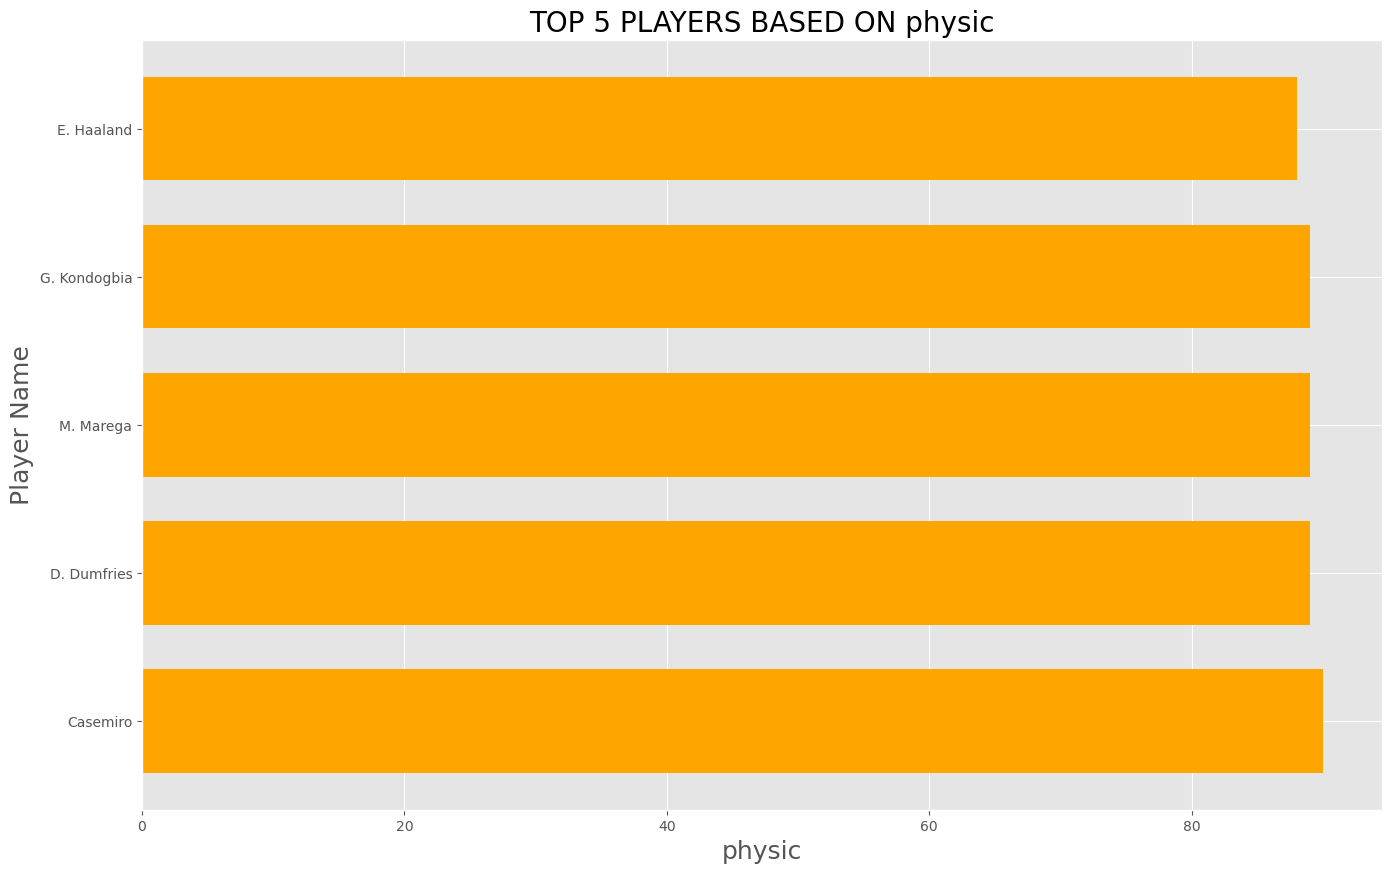

In [173]:
Top5players('physic')

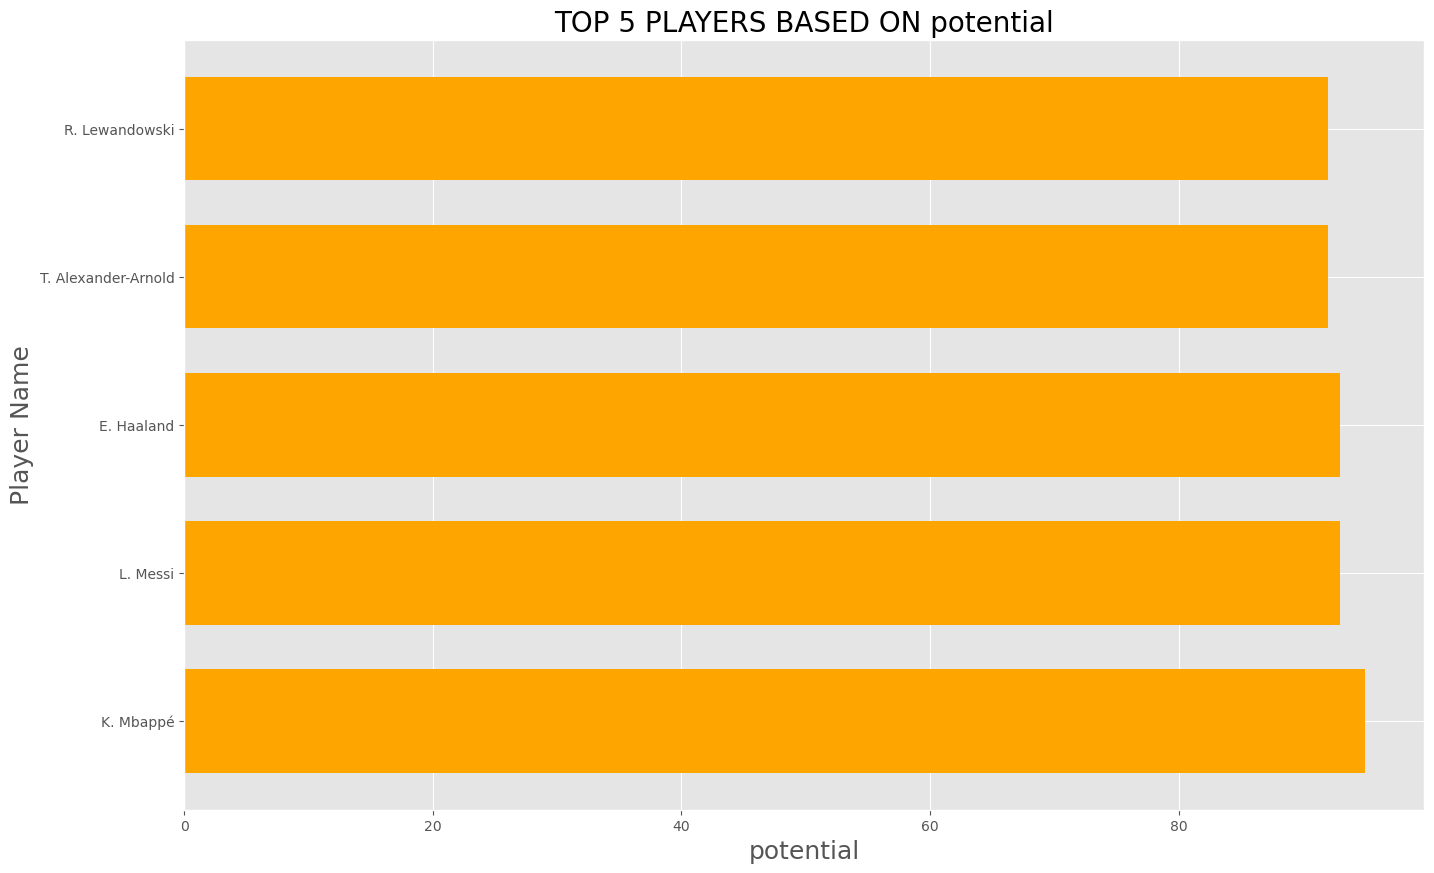

In [174]:
Top5players('potential')

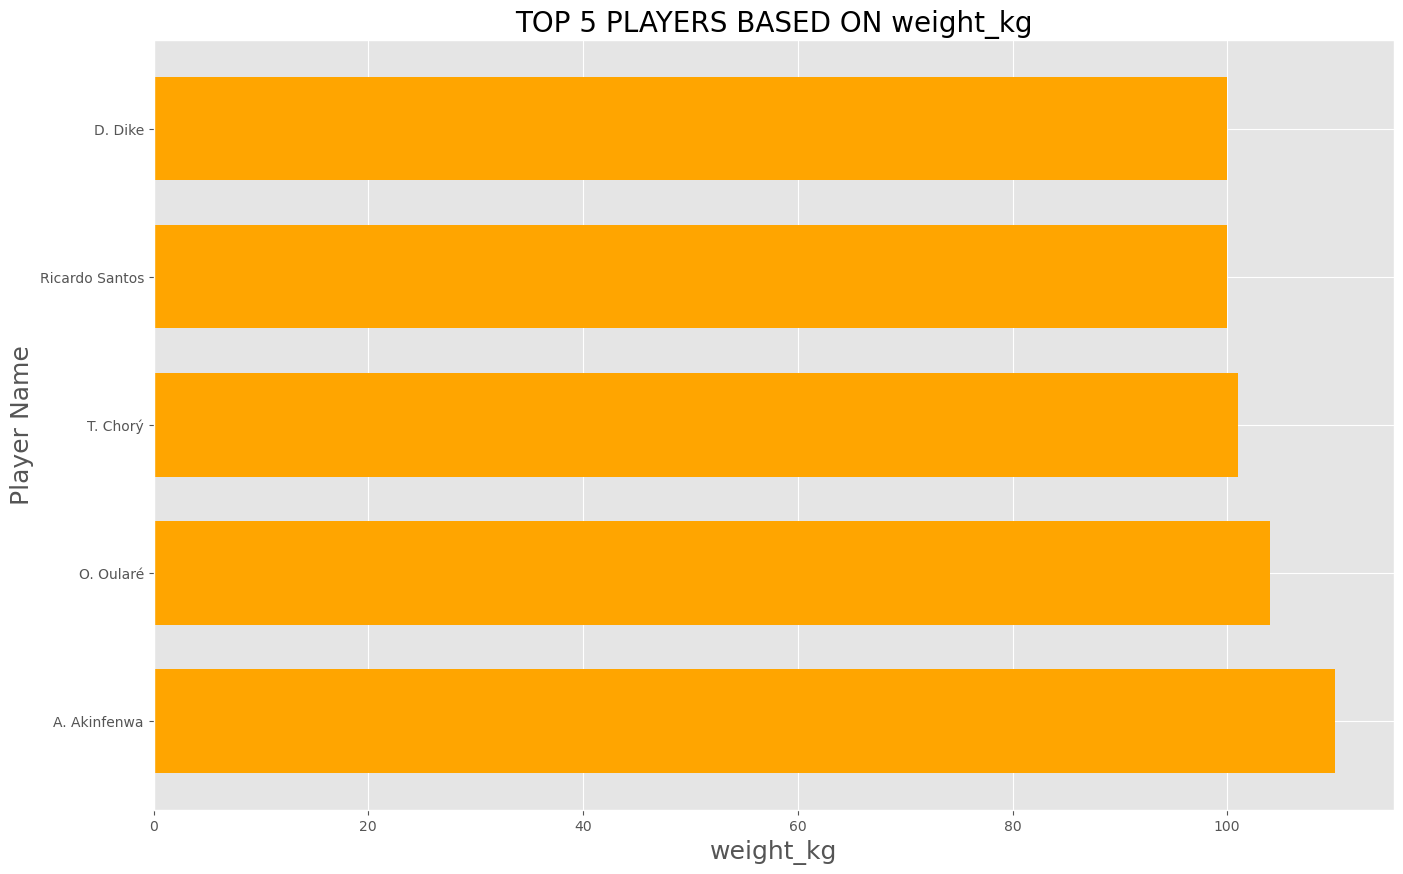

In [175]:
Top5players('weight_kg')

***>100 kg players!!!!***

#### Defining Scope of Improvement and finding the TOP 5 UPCOMING BALLERS !

In [176]:
df['scope_of_improvement'] = df['potential']-df['overall']

In [177]:
df.set_index(['short_name'], inplace=True)

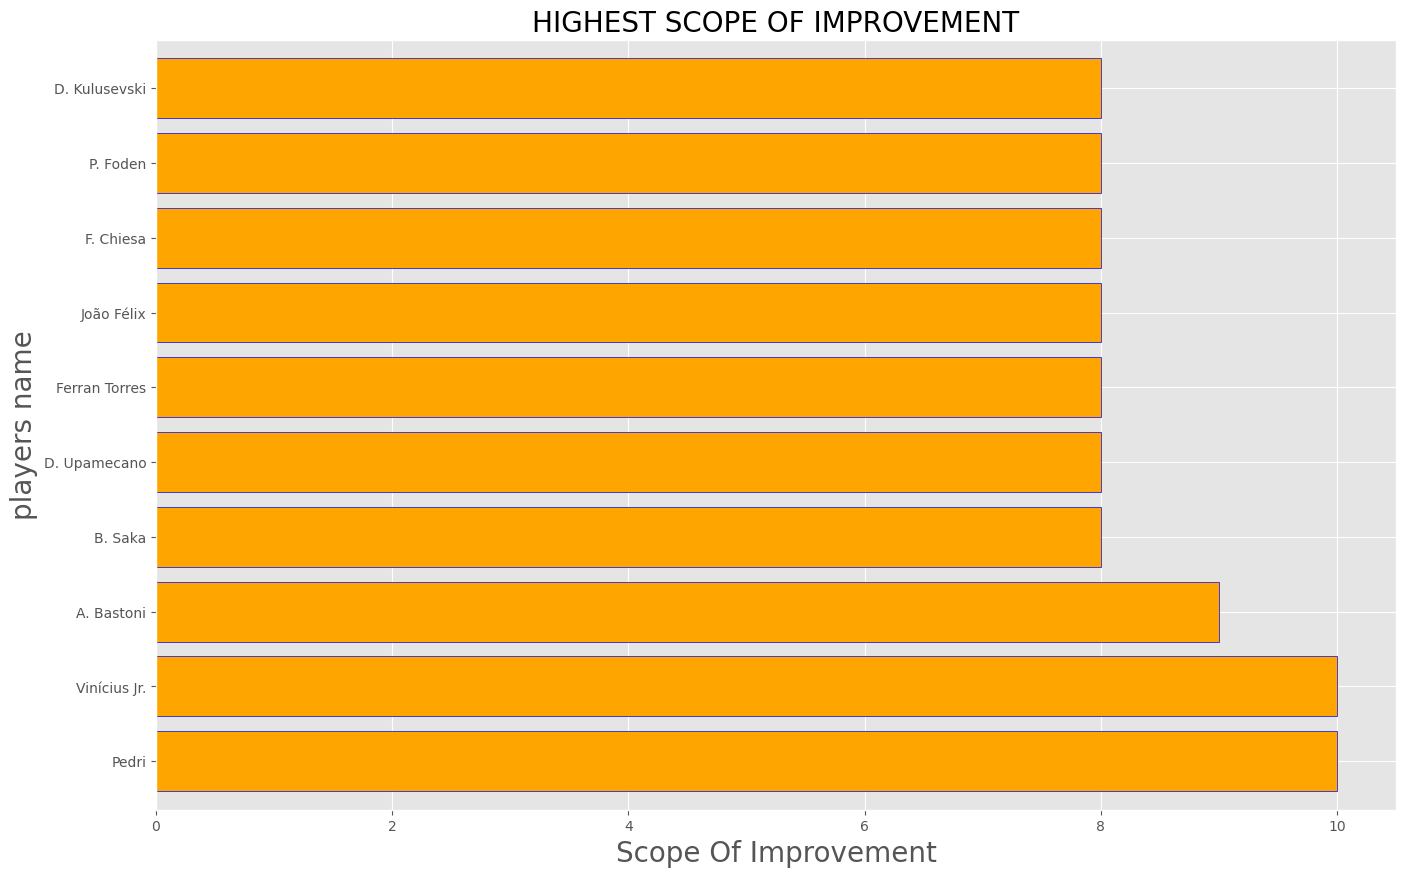

In [178]:
df.query("overall >= 80")['scope_of_improvement'].sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='orange',
    width=0.8,
    figsize=(16, 10),
    edgecolor='blue'
)
plt.title('HIGHEST SCOPE OF IMPROVEMENT',fontsize=20)
plt.xlabel('Scope Of Improvement', fontsize=20)
plt.ylabel('players name', fontsize=20)
plt.show()

#### Defining Value/Wage and Finding the TOP 5 VALUE FOR MONEY PLAYERS !

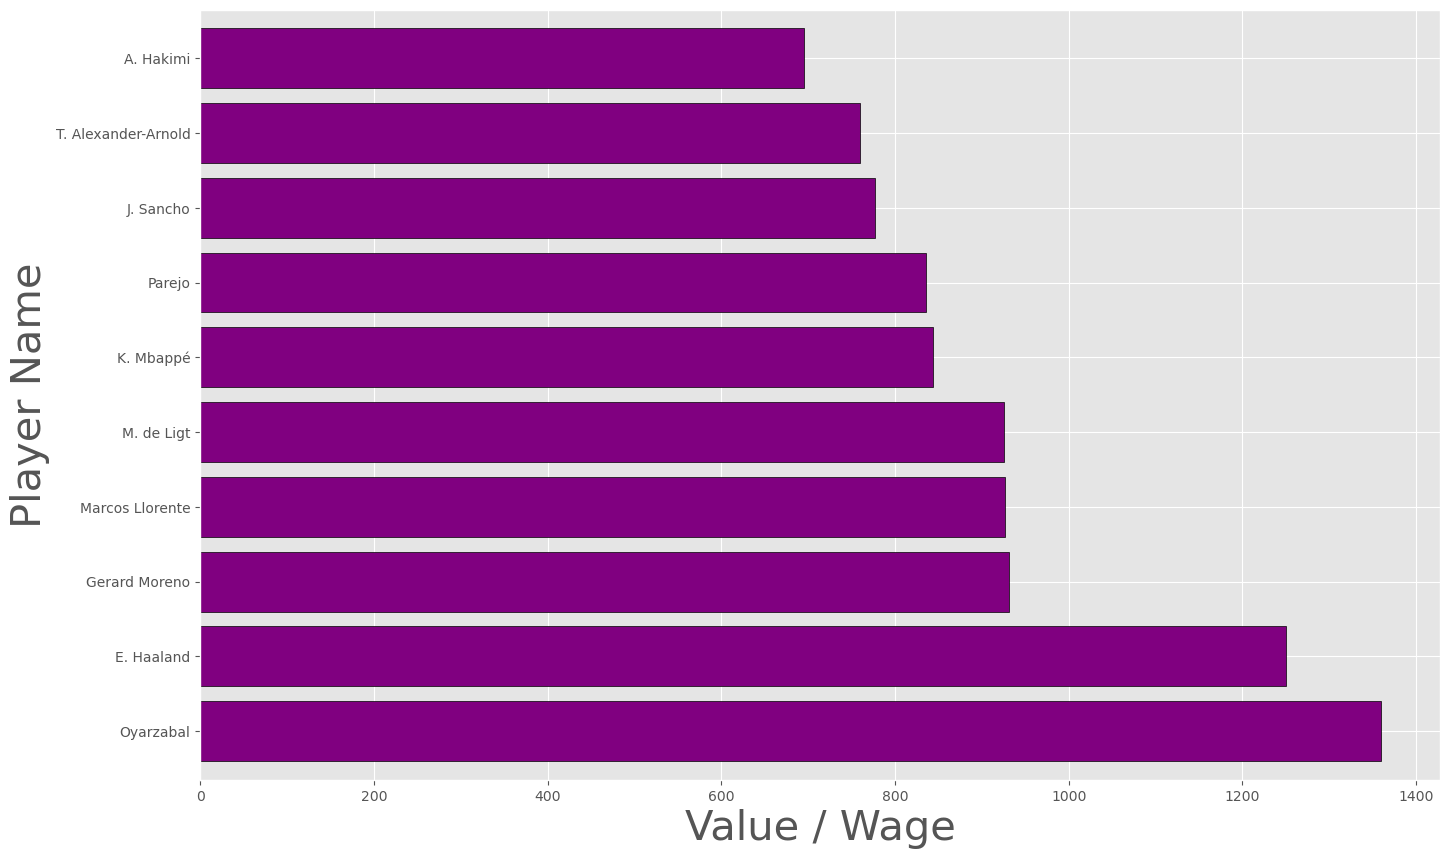

In [179]:
df['value/wage'] = df['value_eur'] / df['wage_eur']

df.query("overall >= 85")['value/wage'].sort_values(ascending=False).head(10).plot(
    kind='barh',
    color='purple',
    width=0.8,
    figsize=(16, 10),
    edgecolor='black'
)

plt.xlabel('Value / Wage', fontsize=30)
plt.ylabel('Player Name', fontsize=30)
plt.show()

### **4. Visualizing Combination of Attributes :**

We can choose any combination of the categories and attributes to look at their distribution using a violin-box plot hybrid.

#### ***WORK RATE VS. OVERALL,VALUE ETC.***

In [180]:
category='work_rate'

fig= px.violin(df,box=True,x=category,y='value_eur')
fig.show()

In [181]:
fig= px.violin(df,box=True,x=category,y='overall')
fig.show()

#### ***CLUB POSITION VS. WAGE***

In [182]:
fig= px.violin(df,box=True,x='club_position',y='wage_eur')
fig.show()

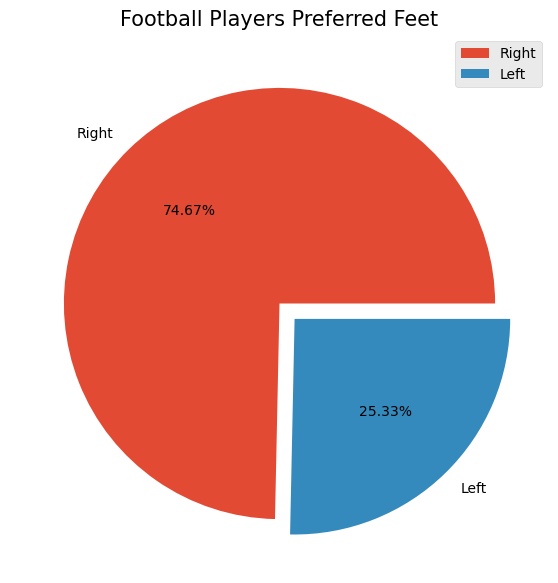

In [183]:
preferred_foot_labels = df["preferred_foot"].value_counts().index  
preferred_foot_values = df["preferred_foot"].value_counts().values 
explode = (0, 0.1) 

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,autopct='%1.2f%%',explode=explode)
plt.title('Football Players Preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()

In [184]:
df.reset_index(inplace=True)

### **5. PLAYER TO PLAYER COMPARISON AS IN FIFA:**

In [185]:
labels=np.array([
    'shooting',
    'passing',
    'dribbling',
    'pace',
    'defending',
    'overall',
    'potential'
    
])

In [186]:
def ComparePlayers(player1,player2):
    i = df[df.short_name.str.contains(player1)][labels].index.item()
    stats = df.loc[i, labels].values

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=stats,
          theta=labels,
          fill='toself',
          name=player1
    ))

    i = df[df.short_name.str.contains(player2)][labels].index.item()
    stats = df.loc[i, labels].values

    fig.add_trace(go.Scatterpolar(
          r=stats,
          theta=labels,
          fill='toself',
          name=player2
    ))
    
    fig.update_layout(
    autosize=False,
    width=700,
    height=700,)

    fig.show()

In [187]:
ComparePlayers('Cristiano Ronaldo','L. Messi')

In [188]:
ComparePlayers('T. Kroos', 'L. Modrić')

In [189]:
ComparePlayers('K. Mbappé', 'E. Haaland')

## **PREDICTION AND FEATURE ANALYSIS USING XGBOOST/LIGHTGBM**

----------------------------------

### **Data Cleaning and Preprocessing**

In [190]:
categorical = ['work_rate', 'international_reputation', 'skill_moves', 'preferred_foot']
attributes = [
    'age',
    'height_cm', 
    'weight_kg', 
    'overall', 
    'value_eur',
    'wage_eur',
    'international_reputation',
    'skill_moves',
    'pace',
    'shooting',
    'passing',
    'dribbling',
    'defending',
    'physic'
]

In [191]:
attributes_df  = df[attributes].dropna()

In [192]:
corr = attributes_df.corr().to_numpy()
fig= px.imshow(corr, aspect="auto", x=attributes,y=attributes,
               color_continuous_scale='RdBu')
fig.update_xaxes(side='top')
fig.show()

Looks like height_cm, weight_kg have low correlation with our target. value_eur, wage_eur are calculated based on the overall value so taking them would not really make sense. We can drop all these attributes

In [193]:
attributes_df.drop(['height_cm', 'weight_kg', 'value_eur', 'wage_eur'], 
                    axis=1, inplace=True)

In [194]:
attributes = [
    'age',
    'international_reputation',
    'skill_moves',
    'pace',
    'shooting',
    'passing',
    'dribbling',
    'defending',
    'physic'
]

### **Normalizing the data and fitting in model**

In [195]:
normalized_df=(attributes_df-attributes_df.min())/(attributes_df.max()-attributes_df.min())

In [196]:
normalized_df.sample(5)

age   overall  international_reputation  skill_moves      pace  \
3423   0.217391  0.543478                       0.0     0.000000  0.579710   
14719  0.434783  0.260870                       0.0     0.000000  0.550725   
5926   0.521739  0.456522                       0.0     0.333333  0.666667   
8023   0.521739  0.413043                       0.0     0.000000  0.318841   
13669  0.478261  0.282609                       0.0     0.000000  0.420290   

       shooting   passing  dribbling  defending    physic  
3423   0.157895  0.382353   0.455882   0.779221  0.672131  
14719  0.315789  0.426471   0.411765   0.532468  0.704918  
5926   0.592105  0.617647   0.588235   0.701299  0.672131  
8023   0.184211  0.294118   0.264706   0.649351  0.803279  
13669  0.368421  0.441176   0.500000   0.597403  0.688525

In [197]:
normalized_df.shape

(17041, 10)

In [198]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



import xgboost as xgb
import eli5
from eli5.sklearn import PermutationImportance
import shap 
import lightgbm

In [199]:
x= normalized_df.loc[:,normalized_df.columns!='overall']
y= normalized_df.overall

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [200]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1000, verbosity = 1,max_depth = 5, 
                           gamma = 0.2, subsample = 0.2, learning_rate = 0.3)

In [201]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [202]:
y_pred = xgb_reg.predict(x_test)

In [203]:
score = xgb_reg.score(x_train, y_train)  
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"The model had {round(score, 4)} accuracy score, {round(mse, 4)} MSE, {round(mae, 4)} MAE and {round(r2, 4)} R2 Score")

The model had 0.9416 accuracy score, 0.0013 MSE, 0.0285 MAE and 0.9377 R2 Score


Looks like there is no major overfitting in the model. Let's visualize how accurate the model can get by taking a small subset of the data to be viewed here.

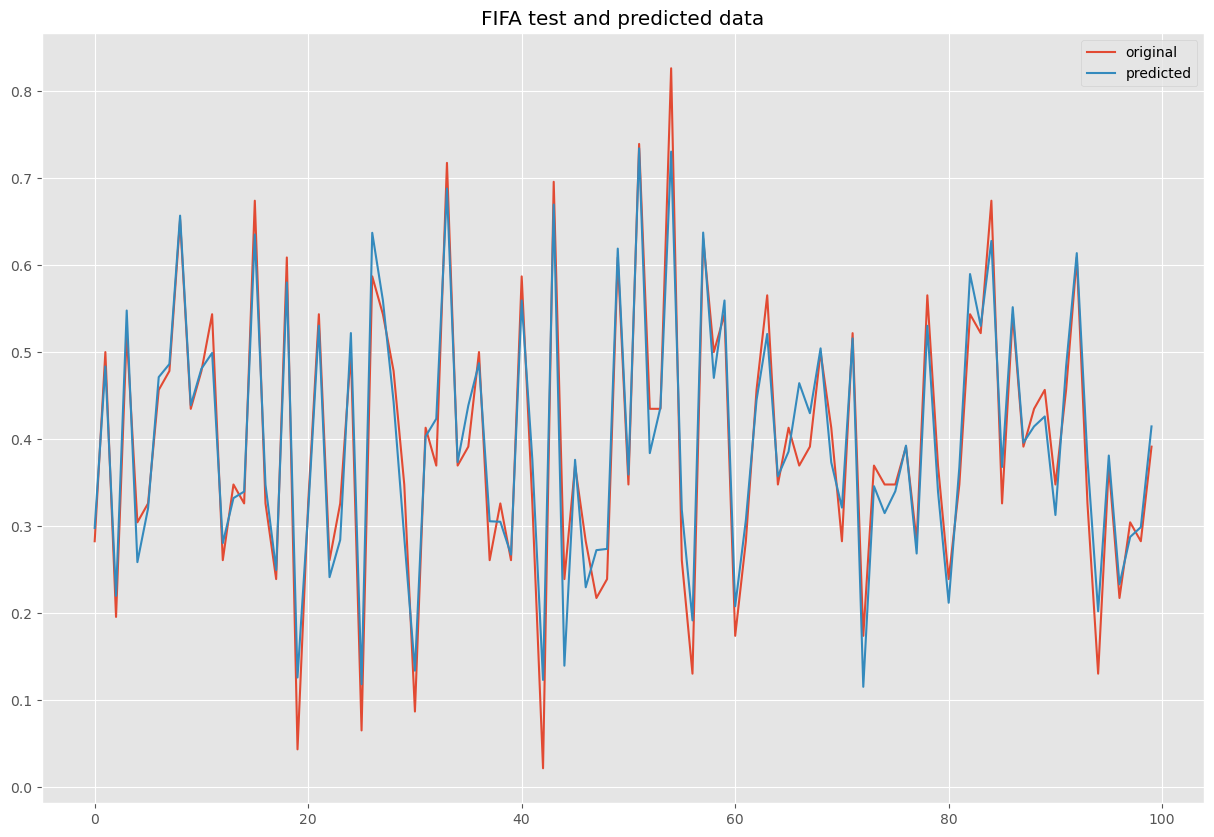

In [204]:
subset = 100
x_ax = range(len(y_test[:subset]))
plt.plot(x_ax, y_test[:subset], label="original")
plt.plot(x_ax, y_pred[:subset], label="predicted")

plt.title("FIFA test and predicted data")

plt.legend()
plt.show()

### **Checking for lightgbm model**

In [205]:
lgr = lightgbm.LGBMRegressor(n_estimators=1000,learning_rate=0.3,reg_lambda=0.2,
                            max_depth=5,boosting_type='dart')

In [206]:
lgr.fit(x_train,y_train)

LGBMRegressor(boosting_type='dart', learning_rate=0.3, max_depth=5,
              n_estimators=1000, reg_lambda=0.2)

In [207]:
y_pred= lgr.predict(x_test)

In [208]:
score = lgr.score(x_train, y_train)  
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"The model had {round(score, 4)} accuracy score, {round(mse, 4)} MSE, {round(mae, 4)} MAE and {round(r2, 4)} R2 Score")

The model had 0.9836 accuracy score, 0.0007 MSE, 0.0206 MAE and 0.9672 R2 Score


WOW!! The model gives 98.36% accuracy.

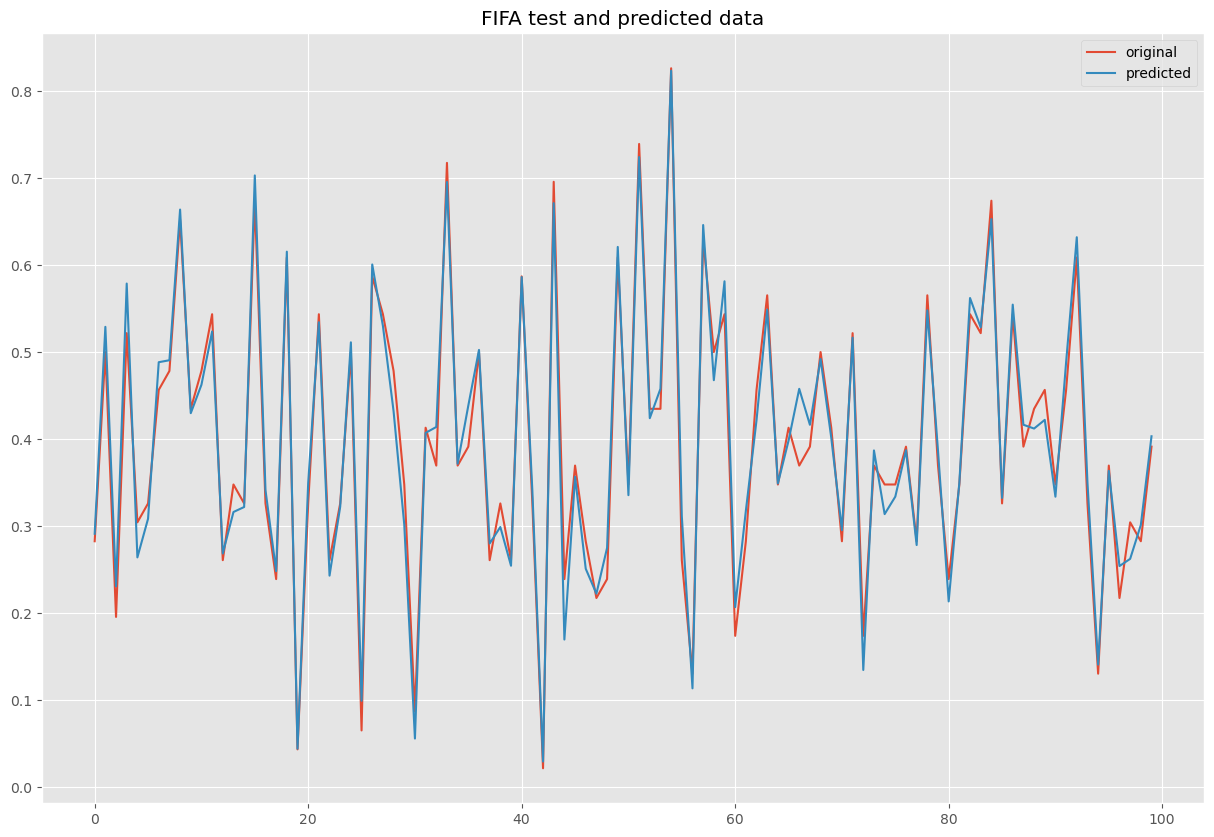

In [209]:
subset = 100
x_ax = range(len(y_test[:subset]))
plt.plot(x_ax, y_test[:subset], label="original")
plt.plot(x_ax, y_pred[:subset], label="predicted")

plt.title("FIFA test and predicted data")

plt.legend()
plt.show()

MUCH BETTER!!!!

### **FEATURE IMPORTANCE USING LIGHTGBM MODEL**

ELI5 and SHAP modules helps us understand how our model's weights and biases work and what they mean. We can use it to visualize how each feature is affecting the model's prediction.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

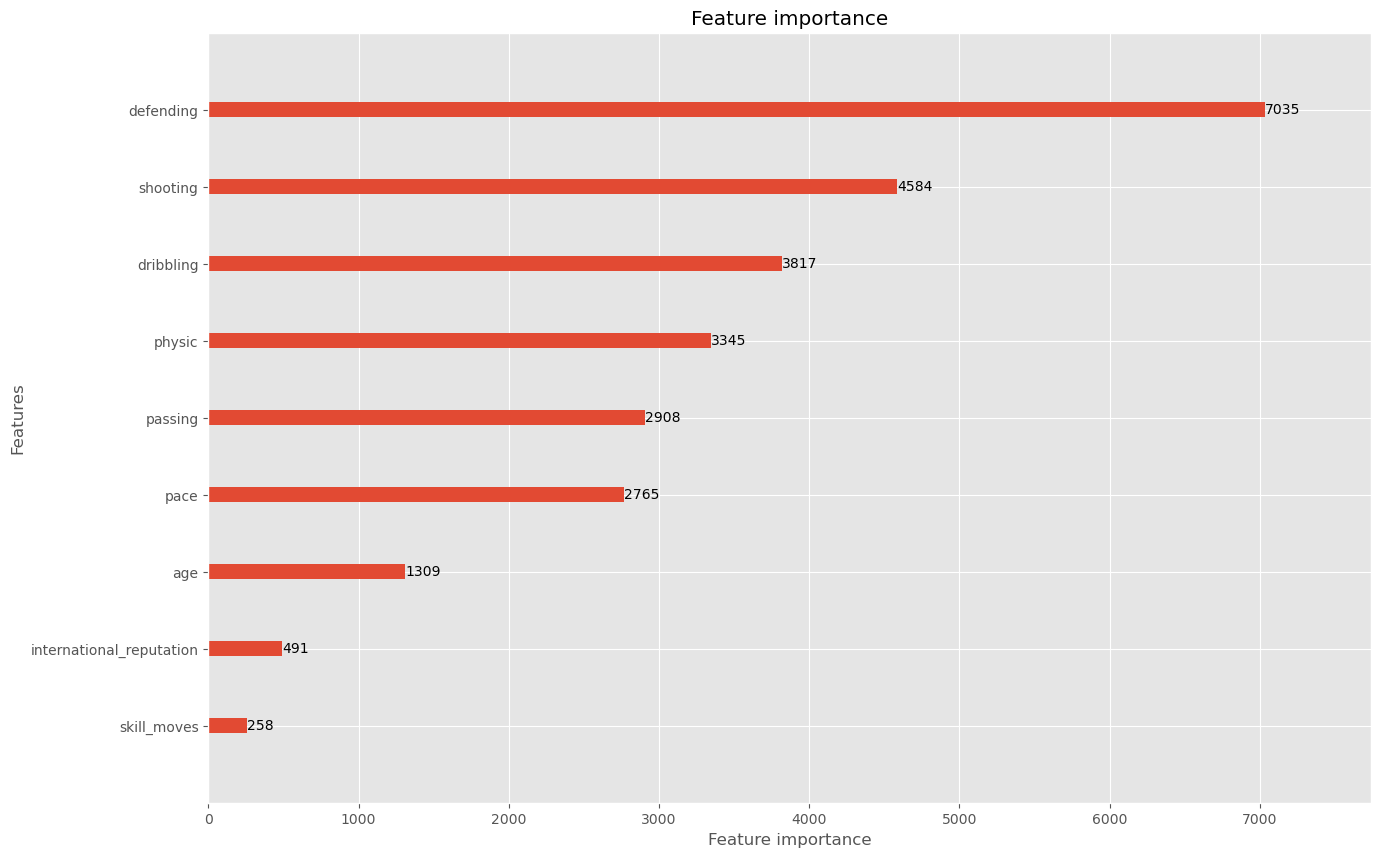

In [210]:
lightgbm.plot_importance(lgr)

In [211]:
perm = PermutationImportance(lgr, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Keep Editor theme light to view this table properly. :)

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

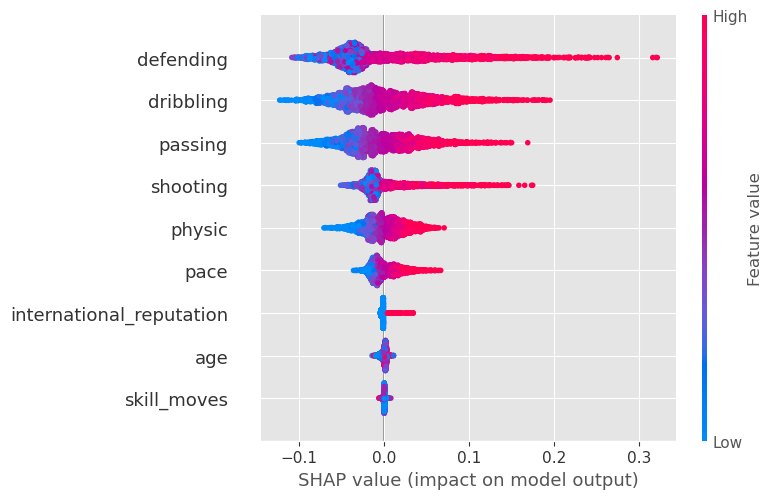

In [212]:
explainer = shap.TreeExplainer(lgr)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

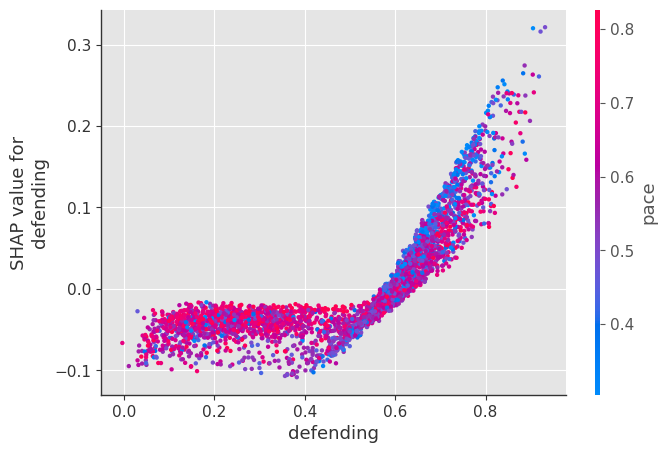

In [213]:
shap.dependence_plot('defending', shap_values, x_test, interaction_index='pace',  x_jitter=1, dot_size=10)

In [214]:
shap.initjs()

data_for_prediction = x_test.iloc[10]
explainer = shap.TreeExplainer(lgr)
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
shap_values = explainer.shap_values(data_for_prediction_array)

shap.force_plot(explainer.expected_value, shap_values, data_for_prediction_array)

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.


That is it for this notebook. Happy Coding & Balling!